In [1]:
import os

os.environ["PRIVBAYES_BIN"] = "./ydnpd/harness/synthesis/privbayes/mac_bin"

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from IPython.display import display, Markdown
import wandb
import tqdm

import ydnpd
from additional import ADDITIONAL_EXPERIMENTS, ADDITIONAL_PATH

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [2]:
ADDITIONAL_DATASETS = sum(list(ADDITIONAL_EXPERIMENTS.values()), [])

WANDB_GROUPS = ["pilot"]

## Tasks

In [3]:
total_task_size = 0
for idx, task in enumerate(ydnpd.span_utility_tasks(additional_datasets=ADDITIONAL_DATASETS), start=1):
    print(f"{idx:2} {task}")
    total_task_size += task.size()
print(f"\nTotal task size: {total_task_size}")

 1 <UtilityTask (#configs=360): privbayes & acs/baseline_domain>
 2 <UtilityTask (#configs=360): privbayes & acs/baseline_univariate>
 3 <UtilityTask (#configs=360): privbayes & acs/arbitrary>
 4 <UtilityTask (#configs=360): privbayes & acs/national>
 5 <UtilityTask (#configs=360): privbayes & acs/massachusetts_upsampled>
 6 <UtilityTask (#configs=360): privbayes & acs/MIX-MAX>
 7 <UtilityTask (#configs=360): privbayes & acs/MIX-UNIF>
 8 <UtilityTask (#configs=360): privbayes & acs/gpt2_10k_upsampled>

Total task size: 2880


## Load Results from W&B

In [4]:
api = wandb.Api()

runs = api.runs(path=f"shlomihod/ydnpd-harness")

utility_tasks_results = []

for run in tqdm.tqdm(runs):
    if run.group in WANDB_GROUPS:
        for step_data in run.history().to_dict(orient="records"):

            # TODO: why does this happen?
            if step_data["_step"] >= ydnpd.harness.config.NUM_RUNS:
                print(f"Run {run.id} has more than {ydnpd.config.NUM_RUNS} steps")
                continue

            for metric in step_data:
                if not metric.startswith("_") and step_data[metric] in ["NaN"]:
                    print(f"Run {run.id} with NaN at metric {metric}")
                    step_data[metric] = np.nan

            utility_tasks_results.append(dict(run.config) | {"evaluation": step_data})

100%|██████████| 1656/1656 [09:04<00:00,  3.04it/s]


## Utility-Related Tasks

## ACS

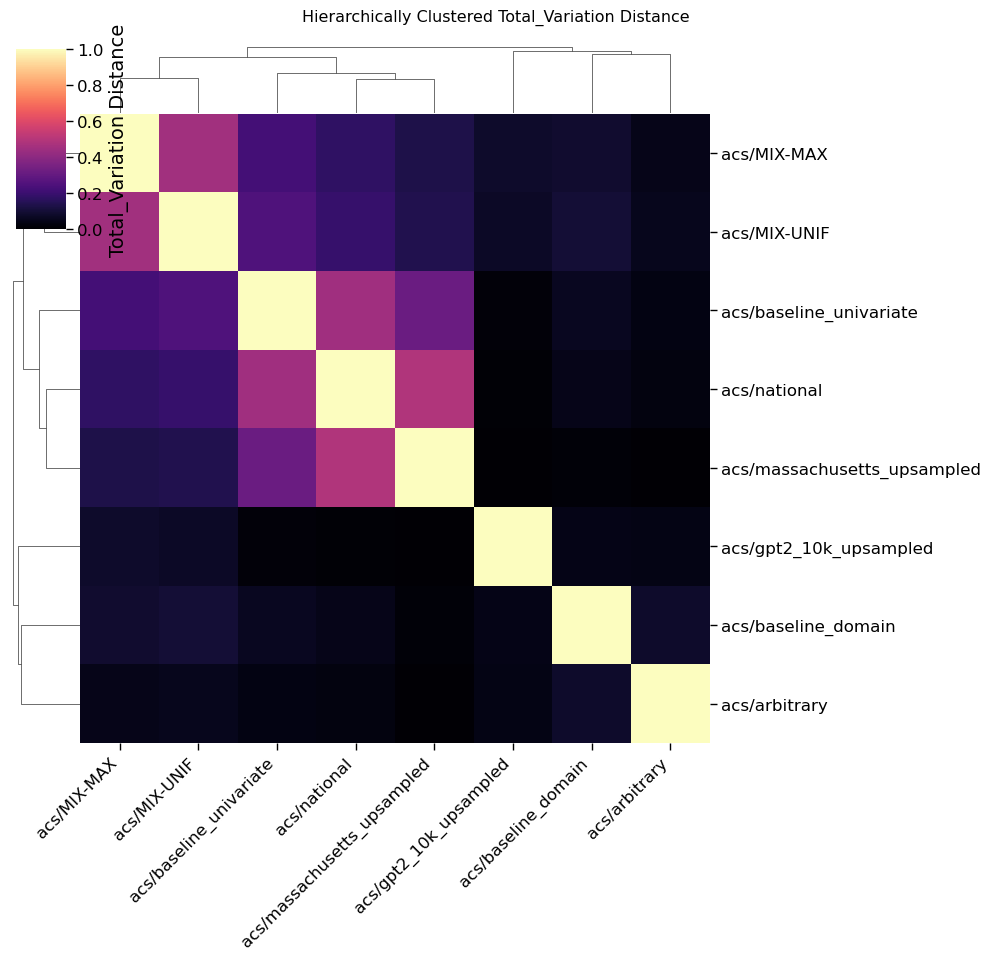

/Users/shlomi/projects/YDNPD/ydnpd/harness/tasks/utility.py:565: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/Users/shlomi/projects/YDNPD/ydnpd/harness/tasks/utility.py:579: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.



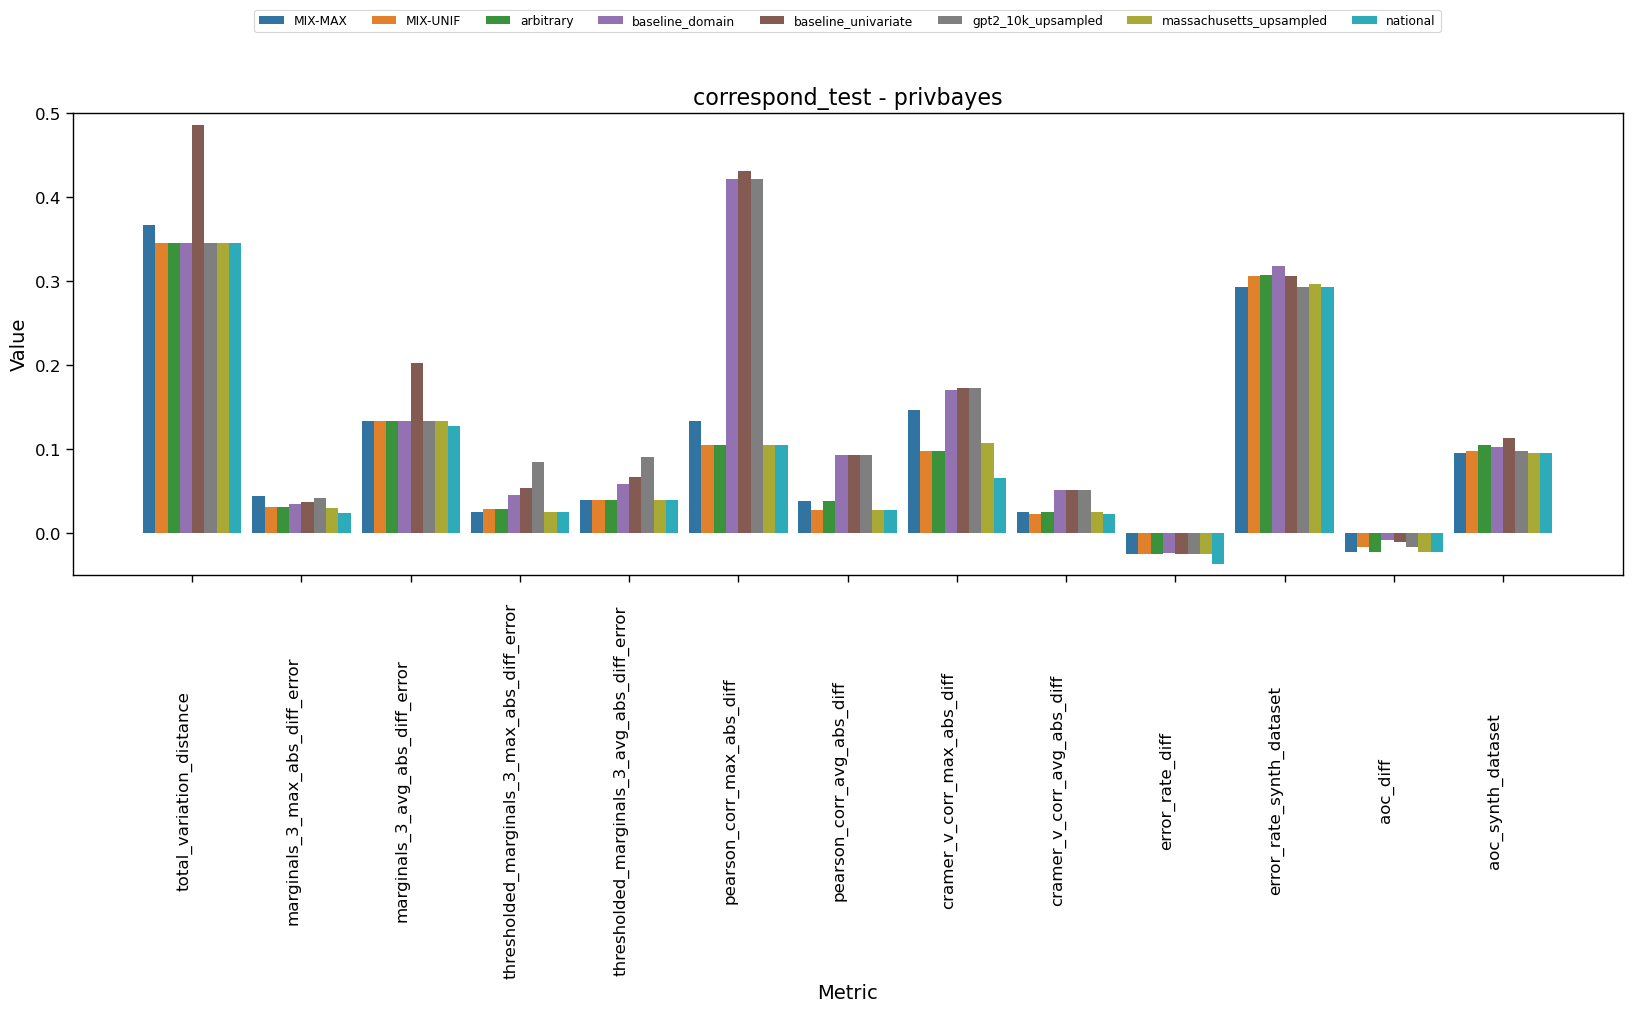

/Users/shlomi/projects/YDNPD/ydnpd/harness/tasks/utility.py:565: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/Users/shlomi/projects/YDNPD/ydnpd/harness/tasks/utility.py:579: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.



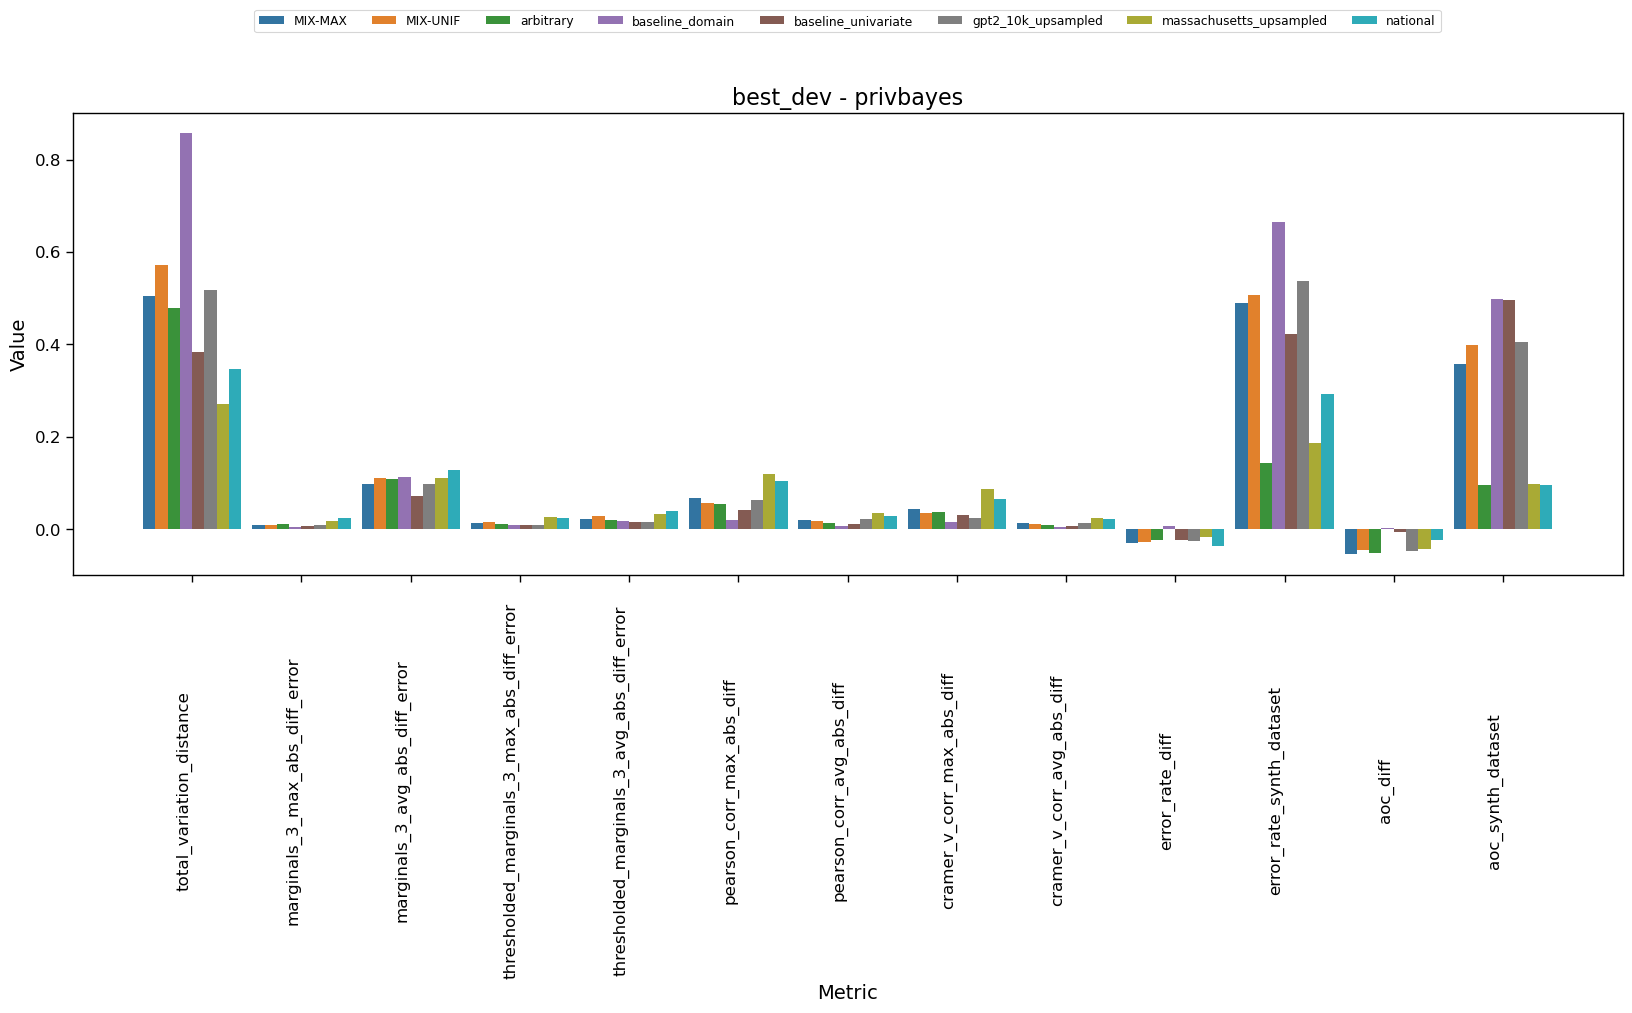

### total_variation_distance

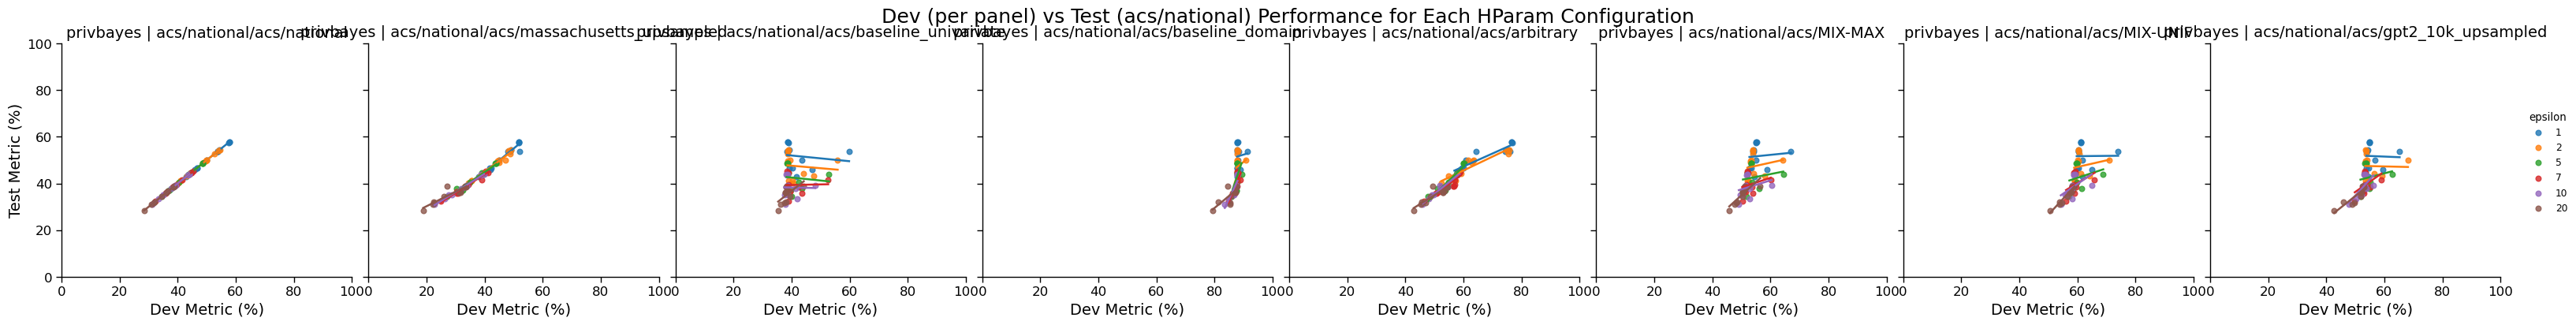

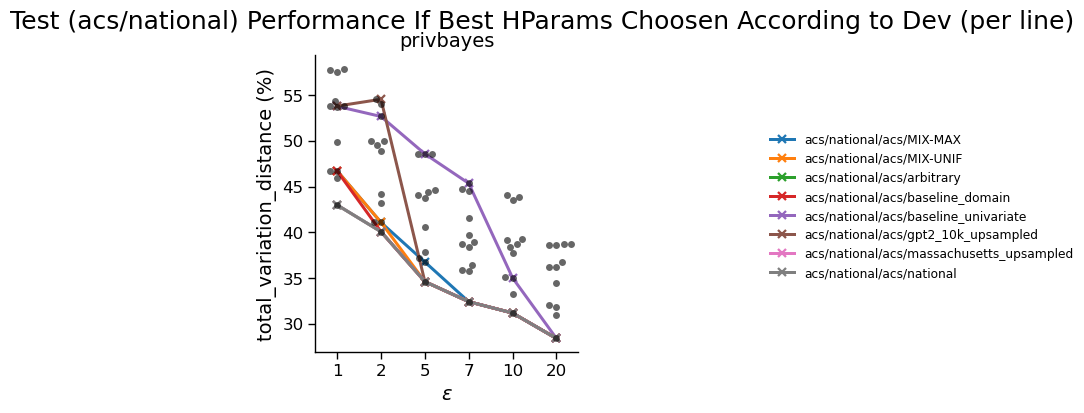

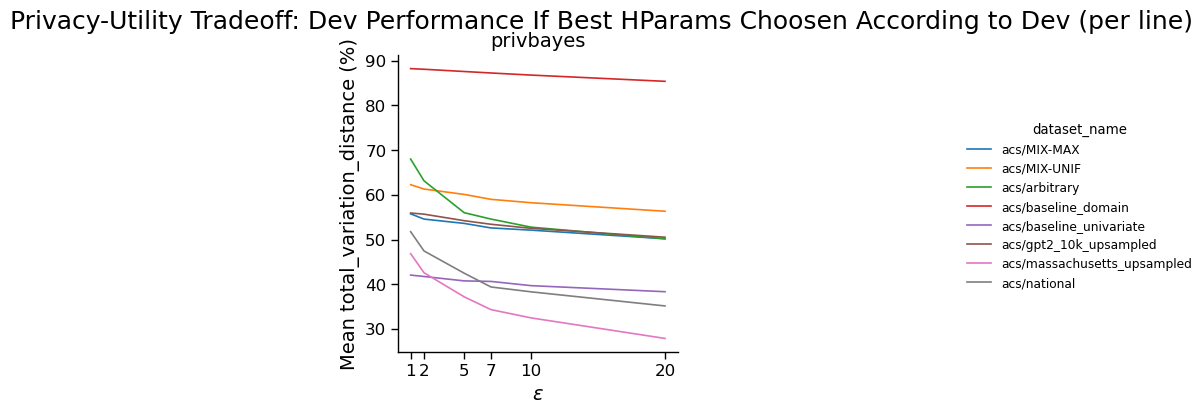

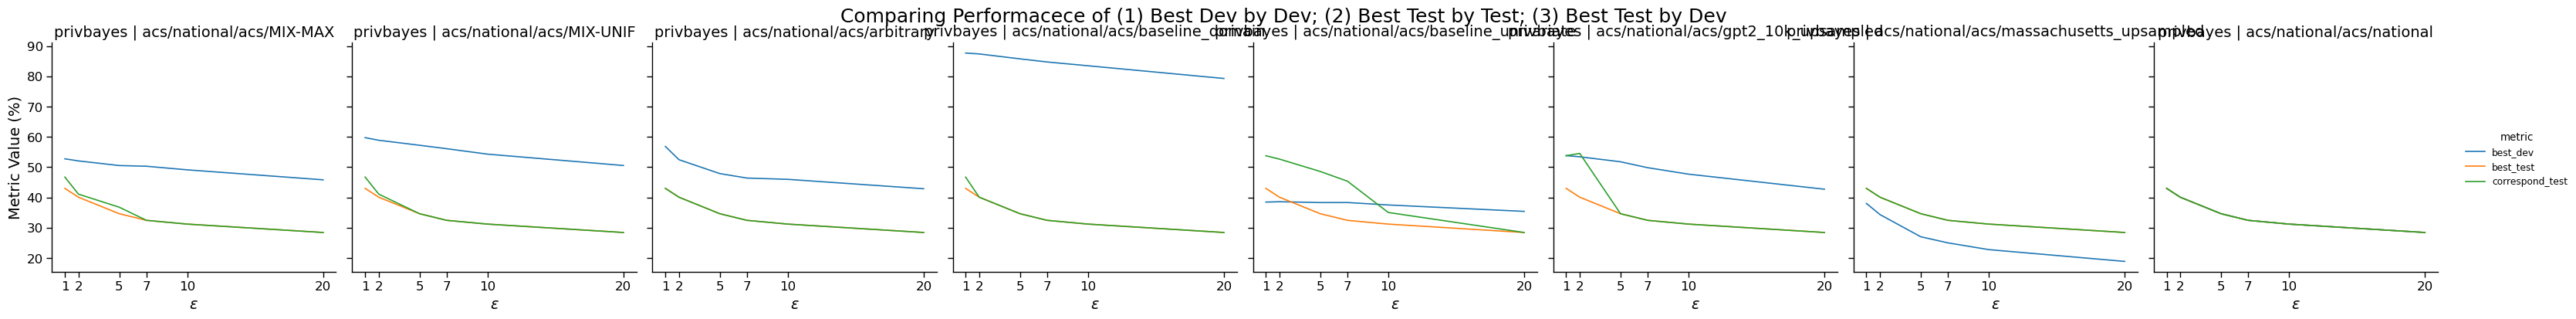

### marginals_3_max_abs_diff_error

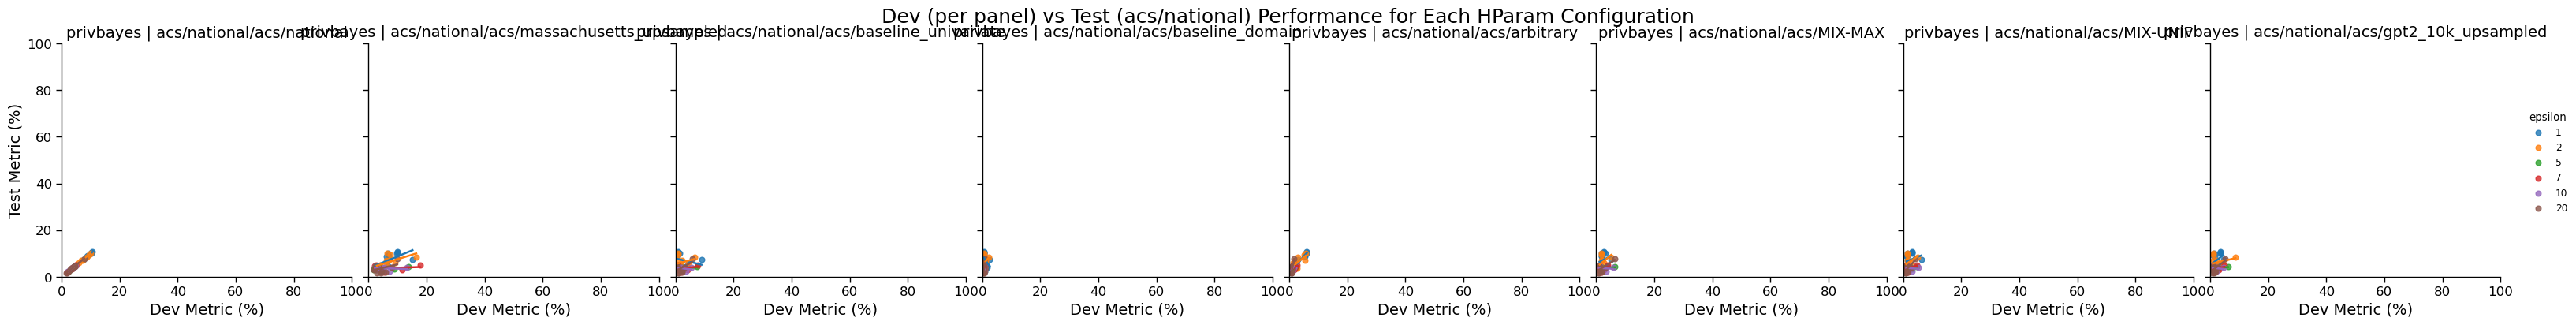

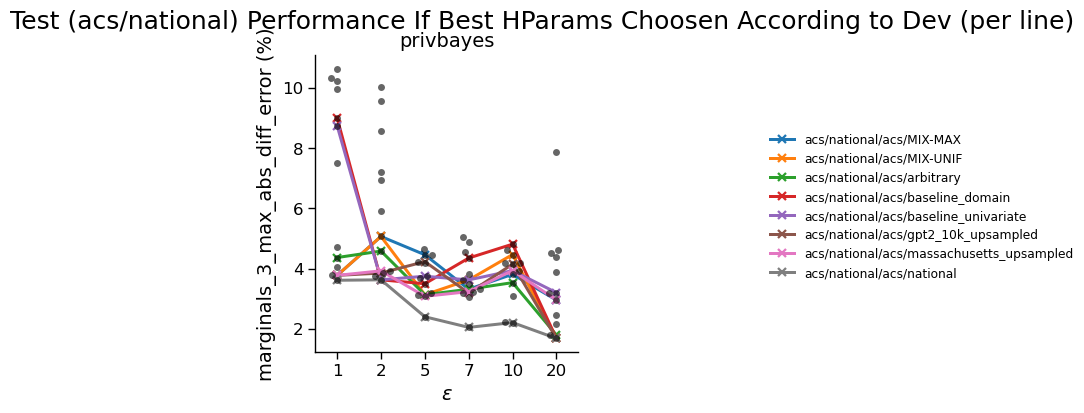

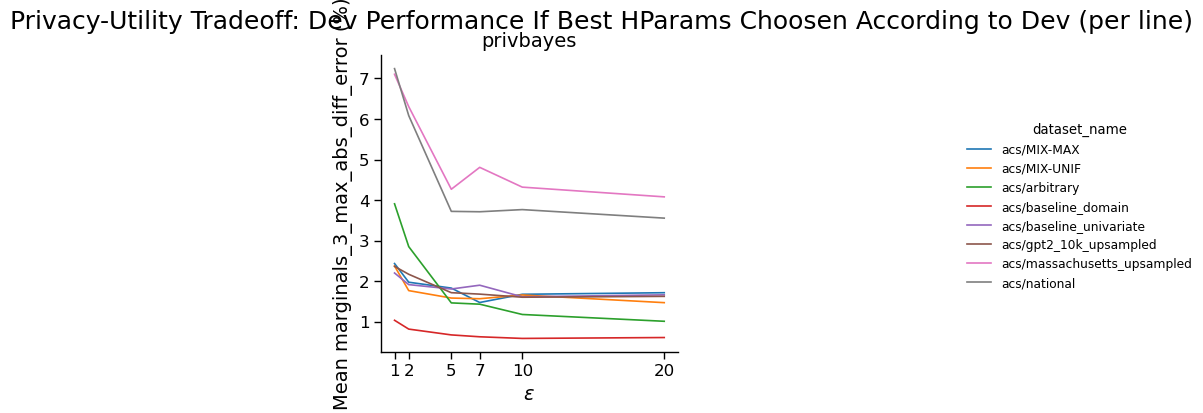

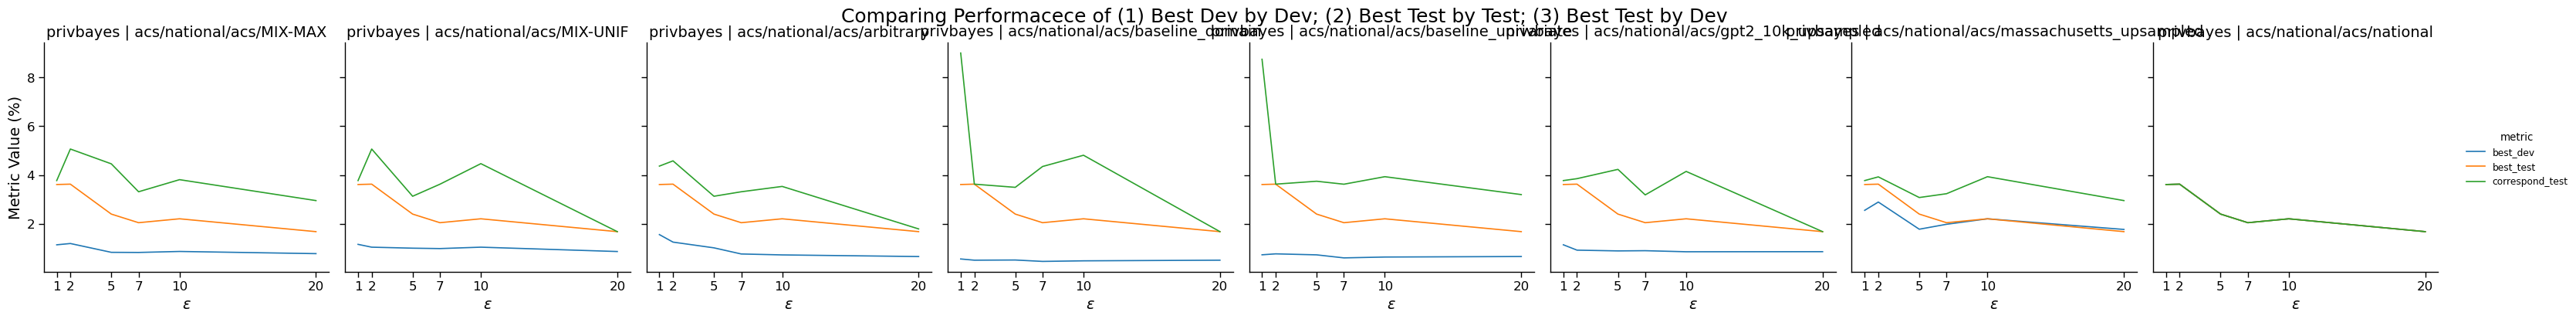

### marginals_3_avg_abs_diff_error

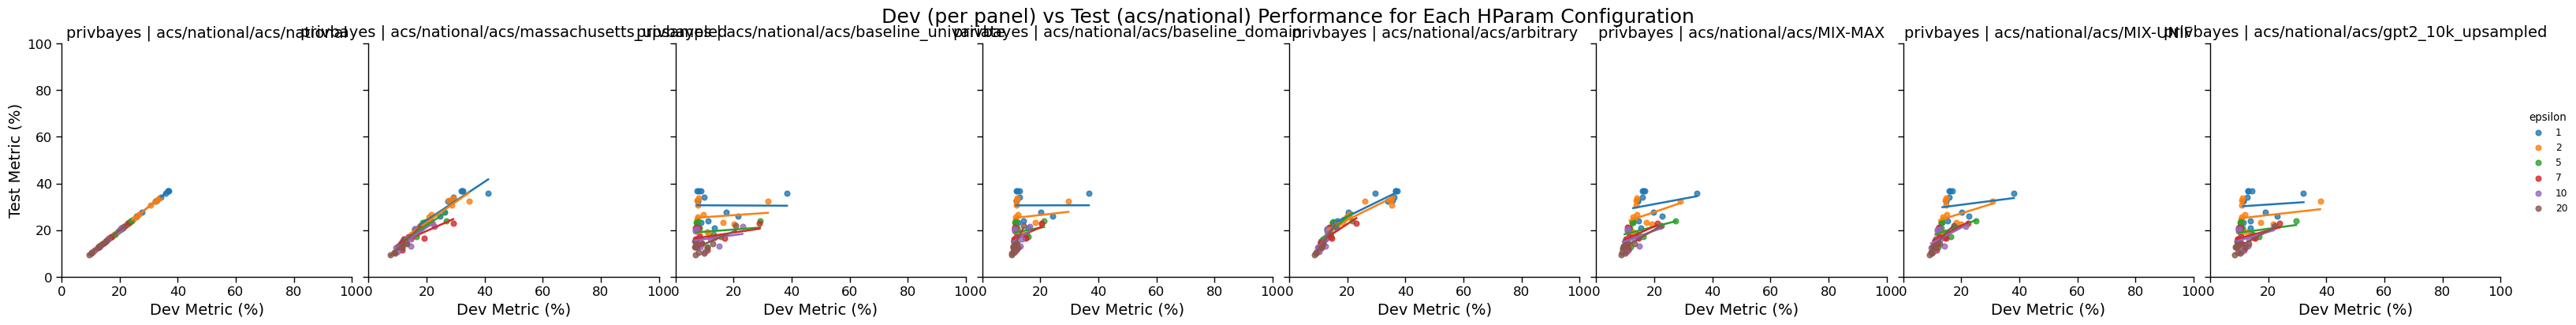

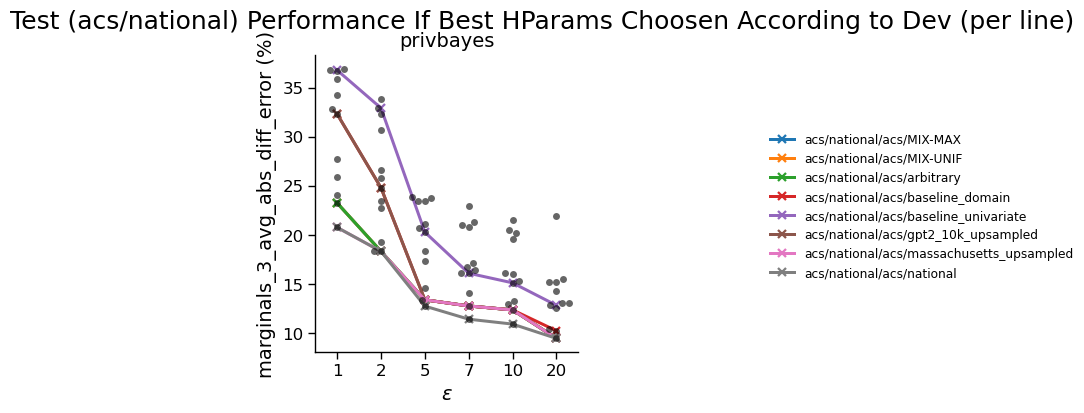

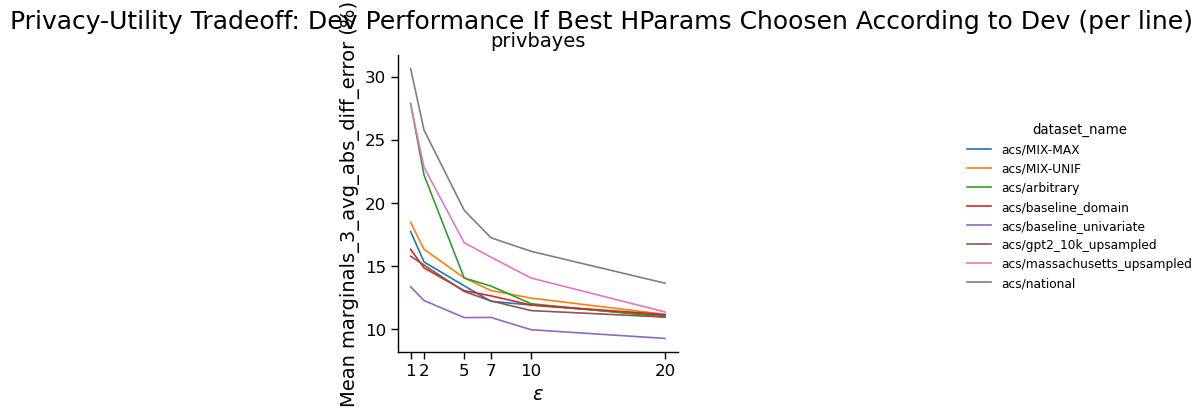

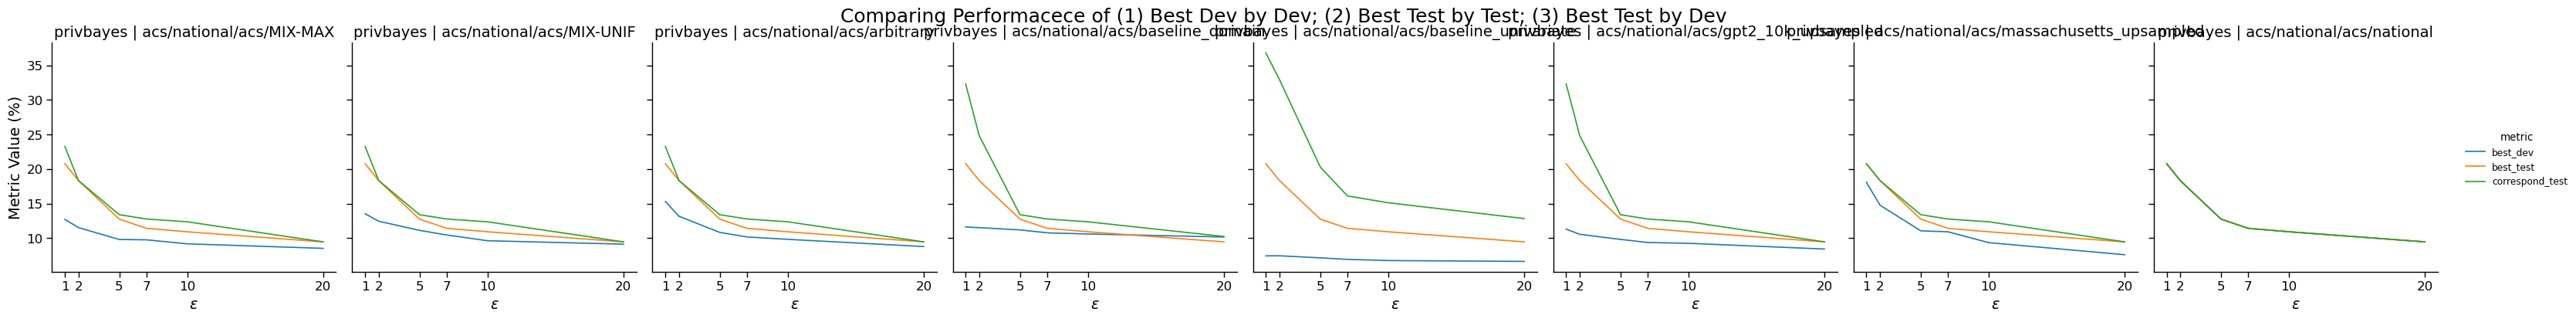

### thresholded_marginals_3_max_abs_diff_error

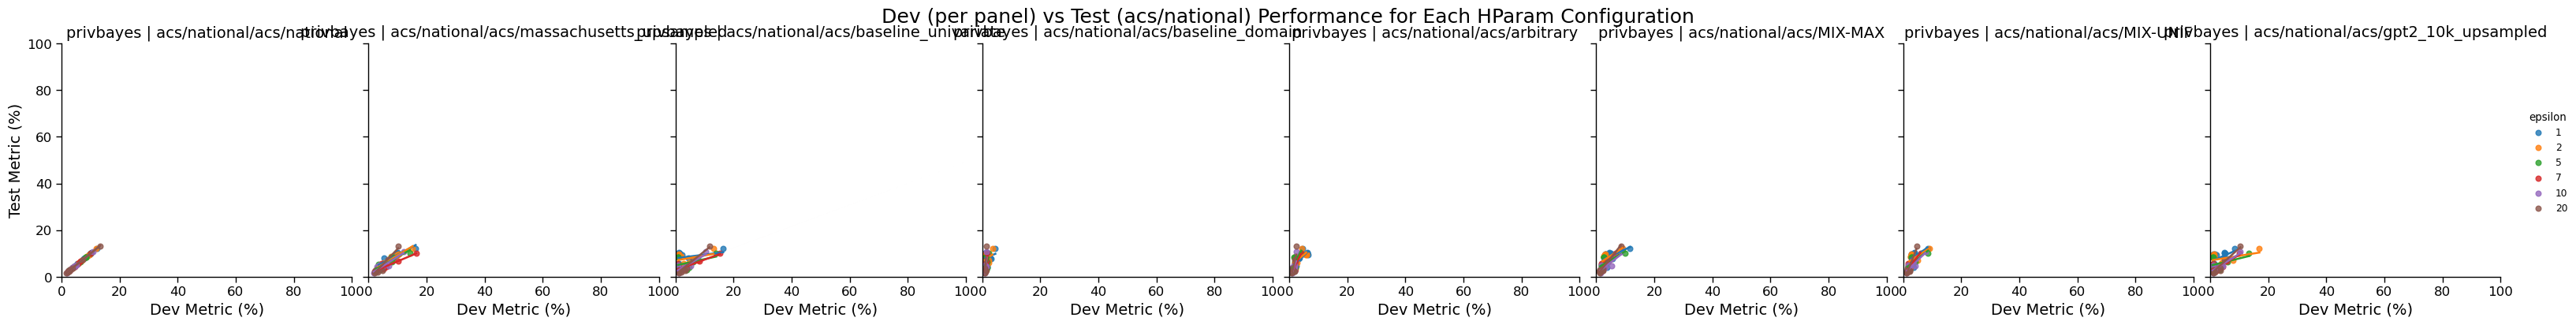

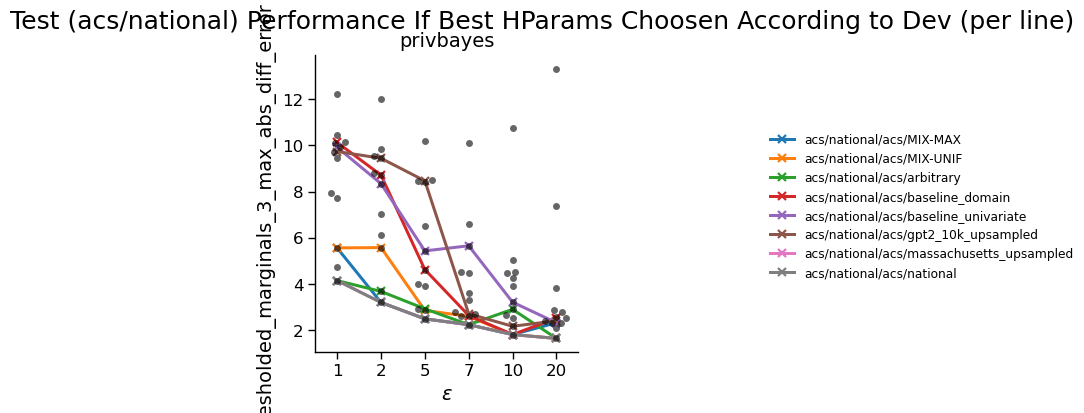

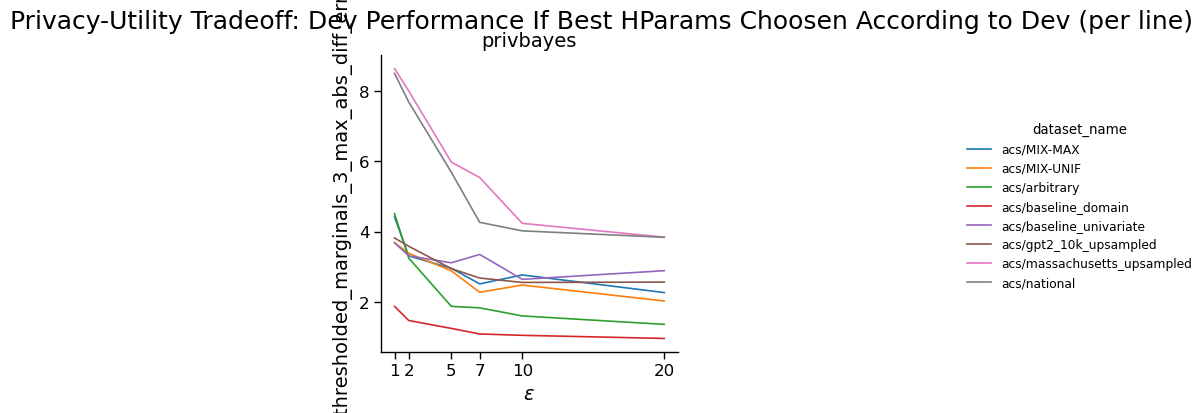

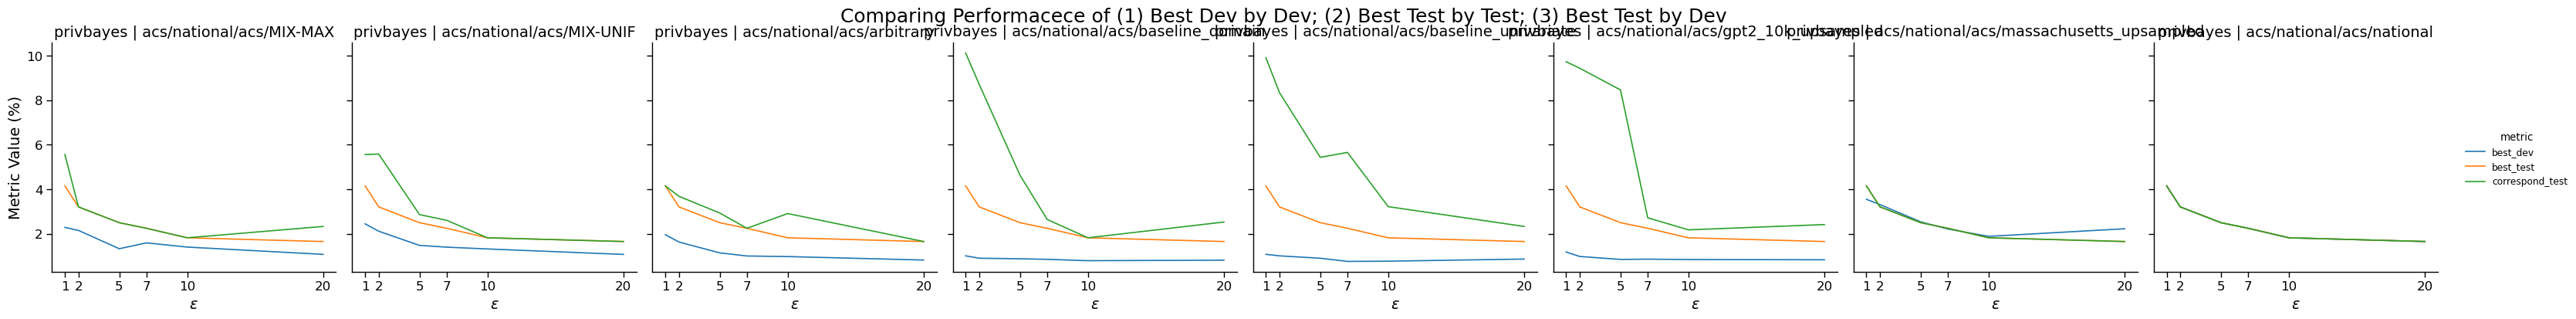

### thresholded_marginals_3_avg_abs_diff_error

/opt/homebrew/Caskroom/miniconda/base/envs/ydnpd/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



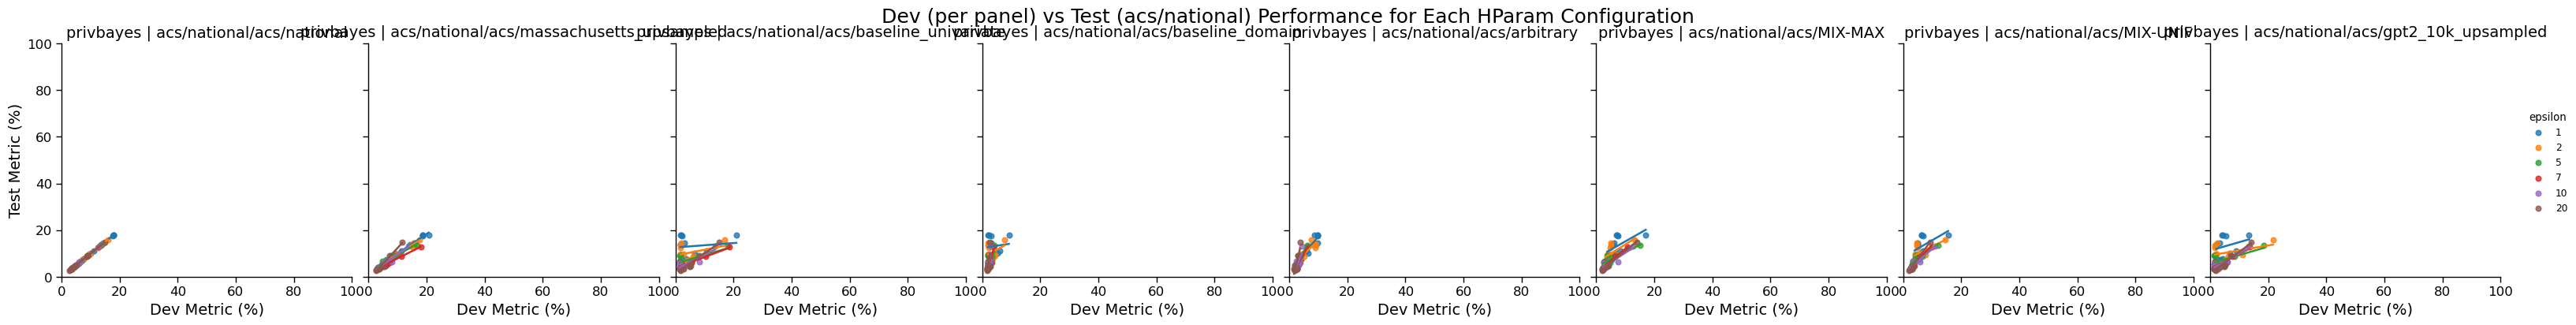

/opt/homebrew/Caskroom/miniconda/base/envs/ydnpd/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



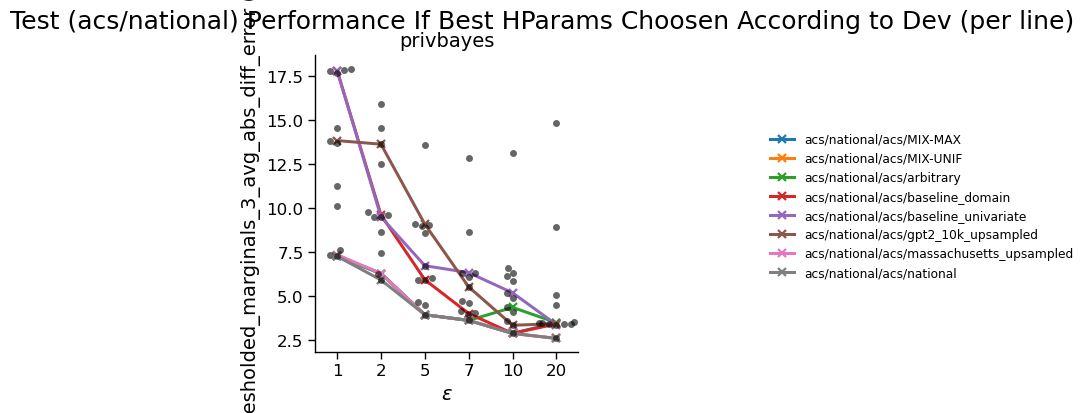

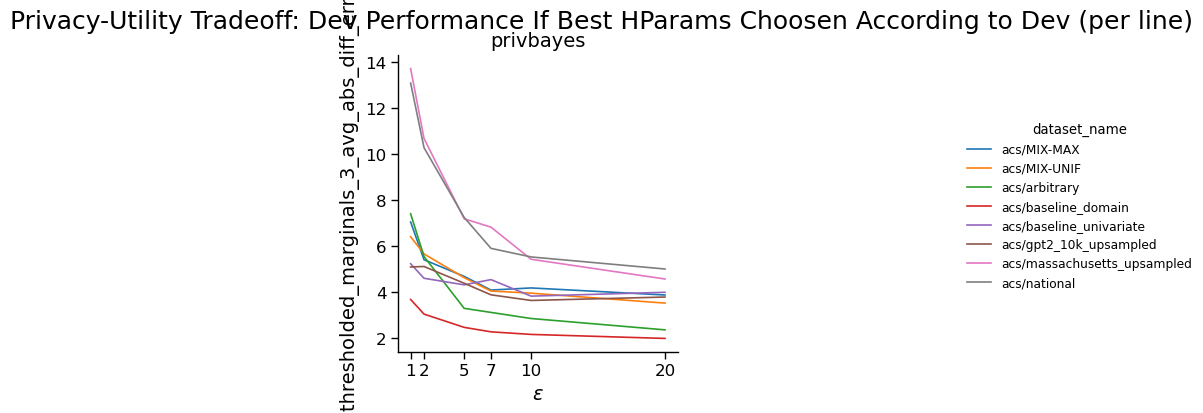

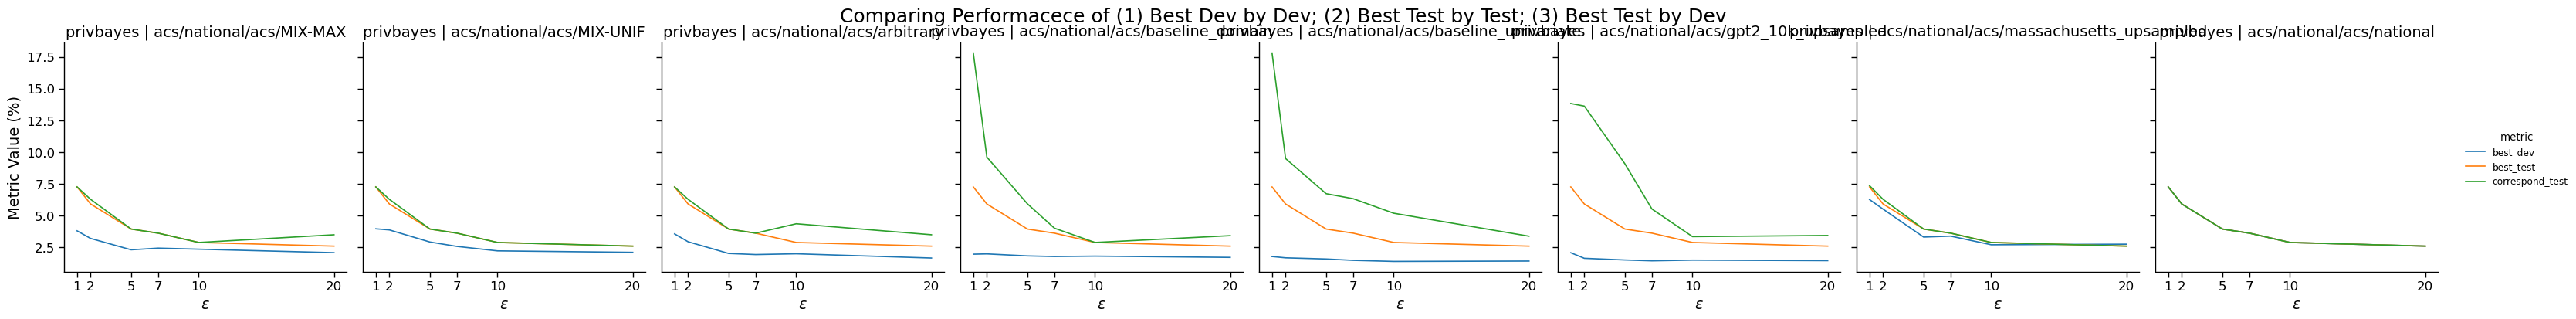

### pearson_corr_max_abs_diff

/opt/homebrew/Caskroom/miniconda/base/envs/ydnpd/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

8.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



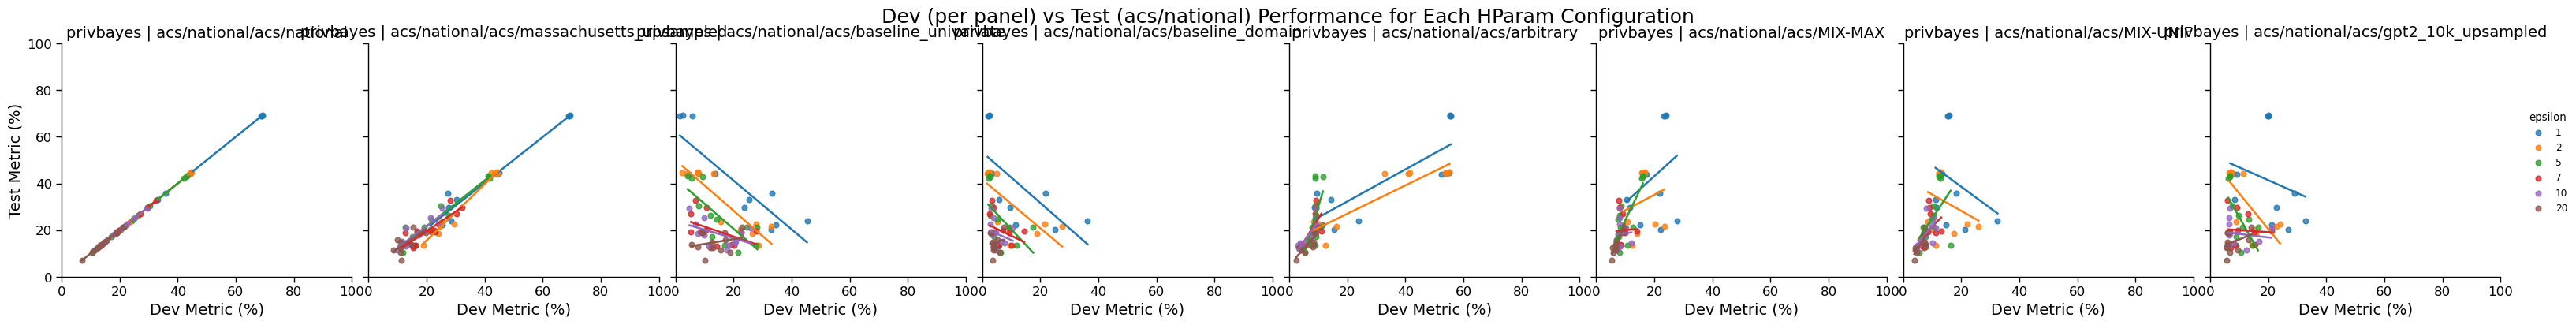

/opt/homebrew/Caskroom/miniconda/base/envs/ydnpd/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

8.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



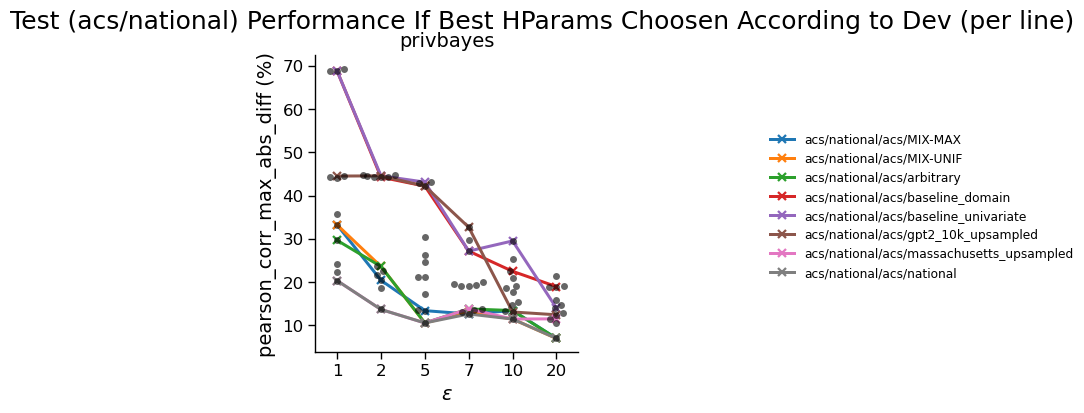

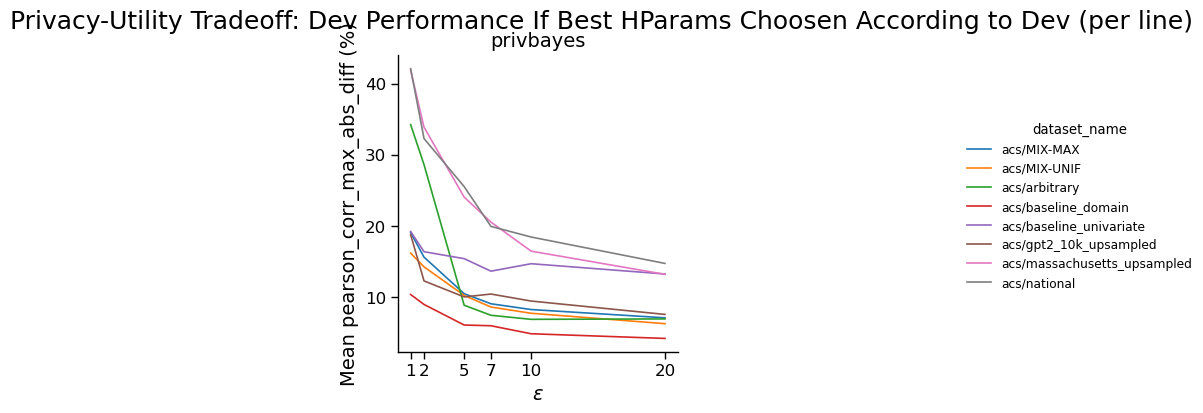

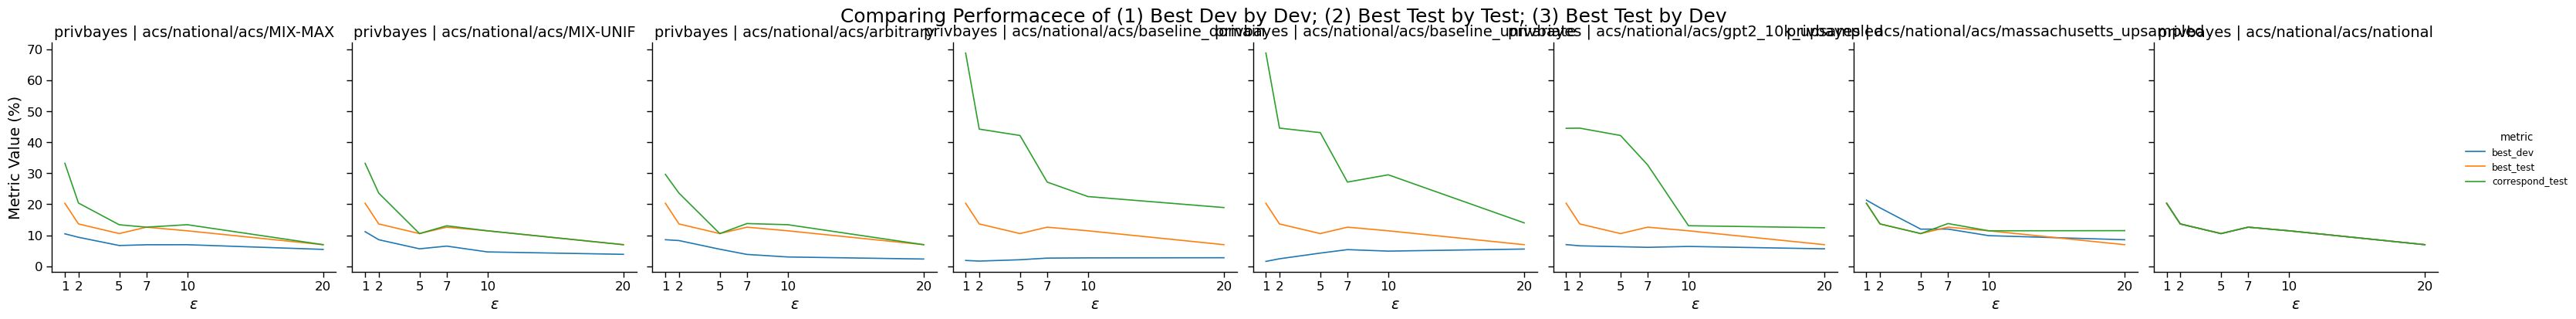

### pearson_corr_avg_abs_diff

/opt/homebrew/Caskroom/miniconda/base/envs/ydnpd/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

8.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



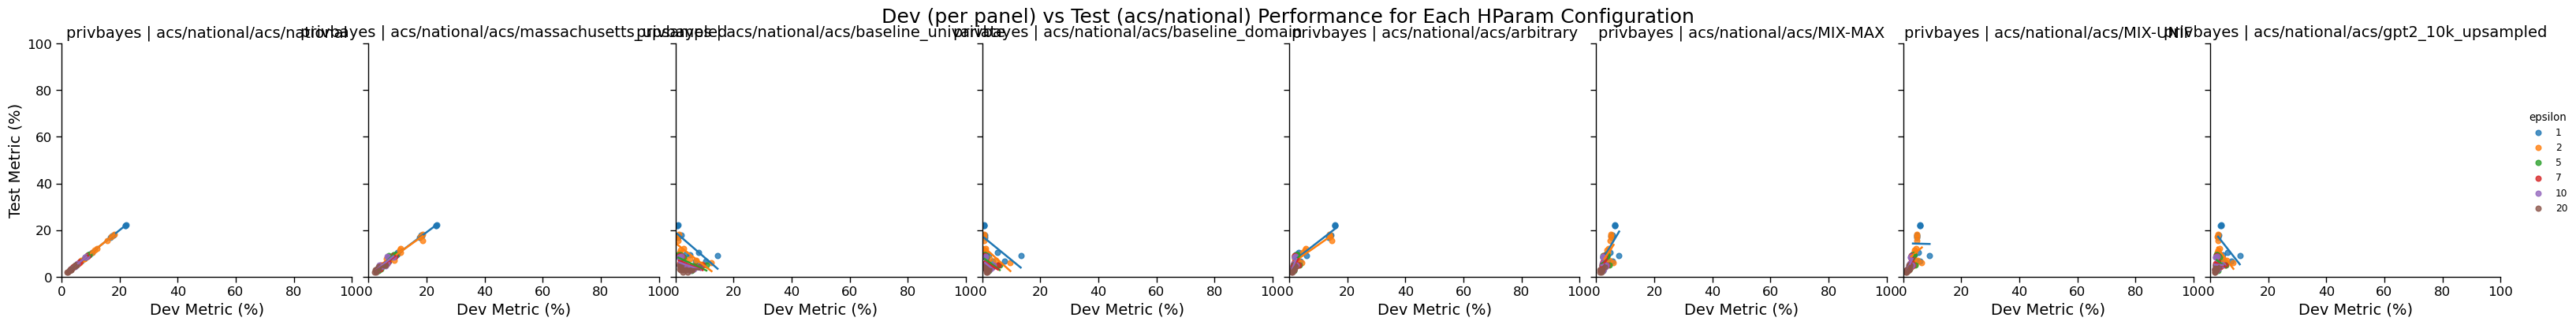

/opt/homebrew/Caskroom/miniconda/base/envs/ydnpd/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

8.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



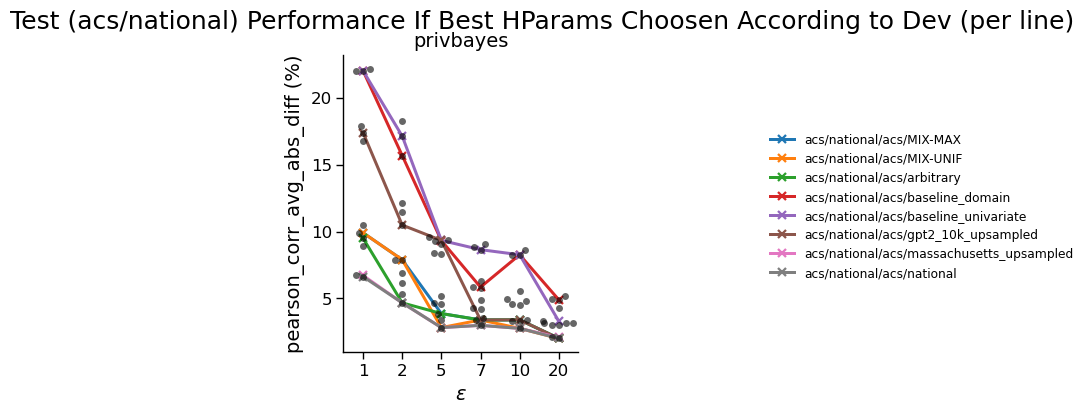

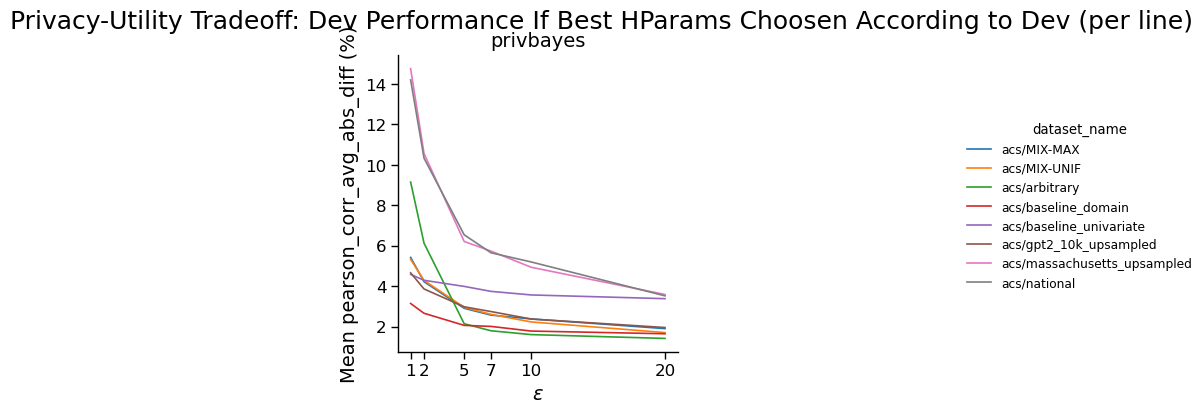

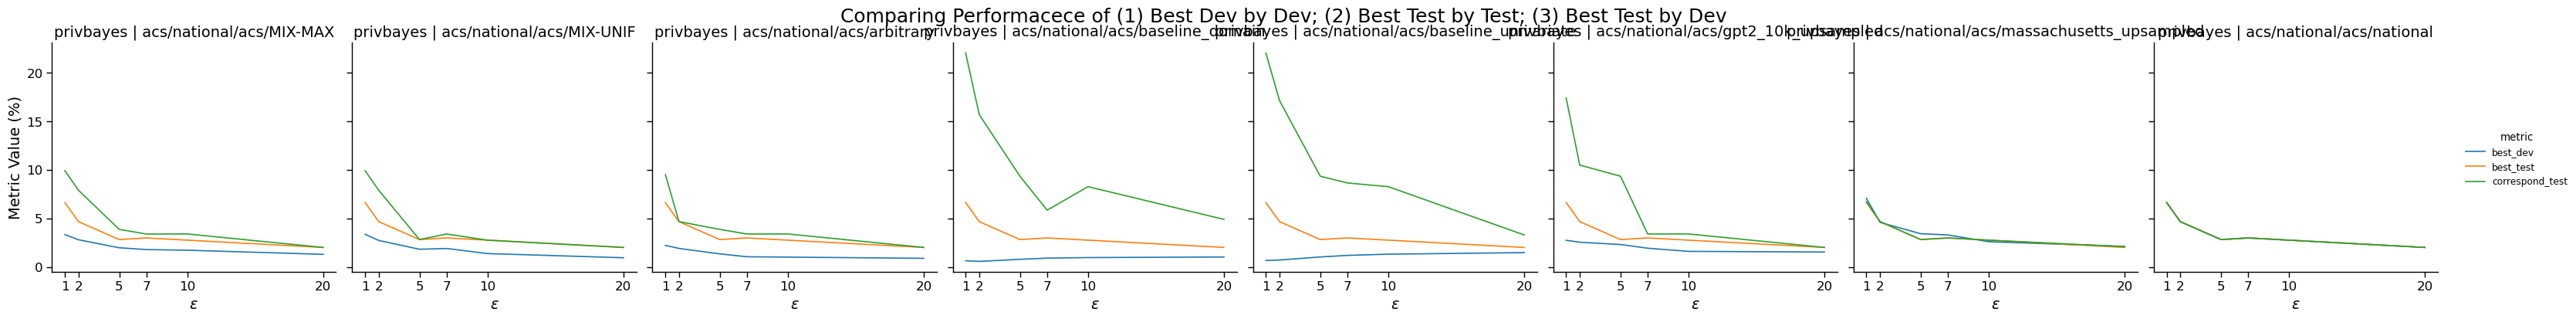

### cramer_v_corr_max_abs_diff

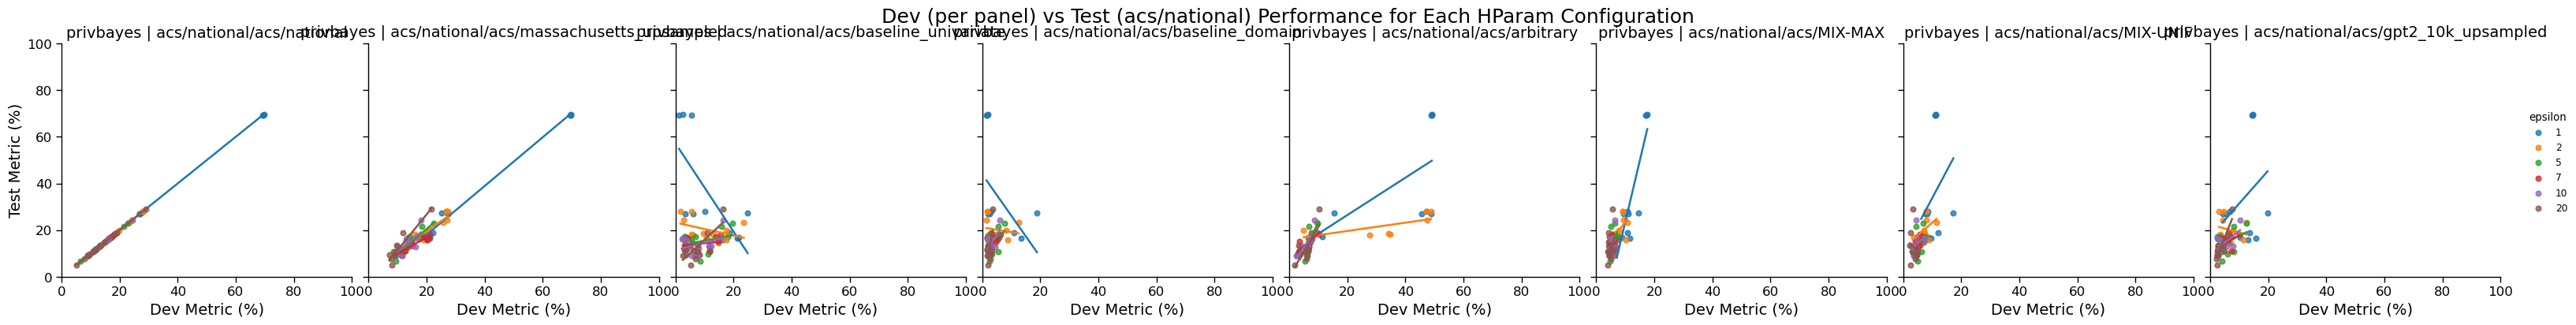

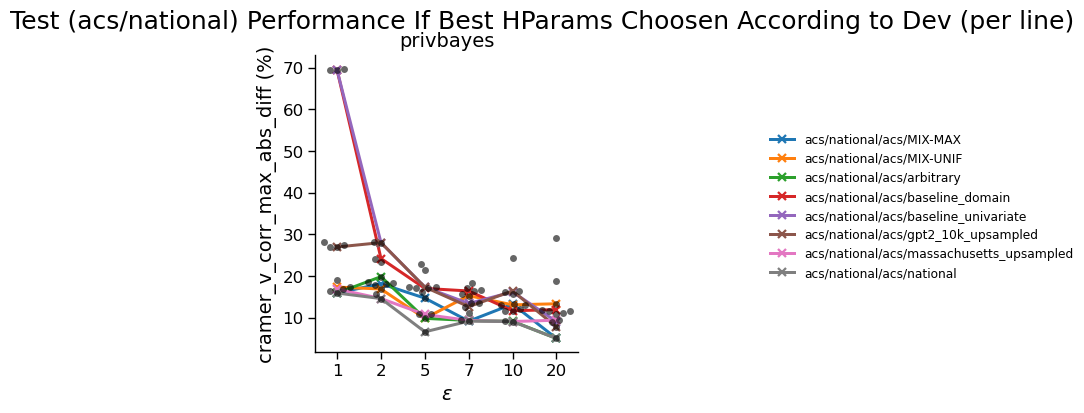

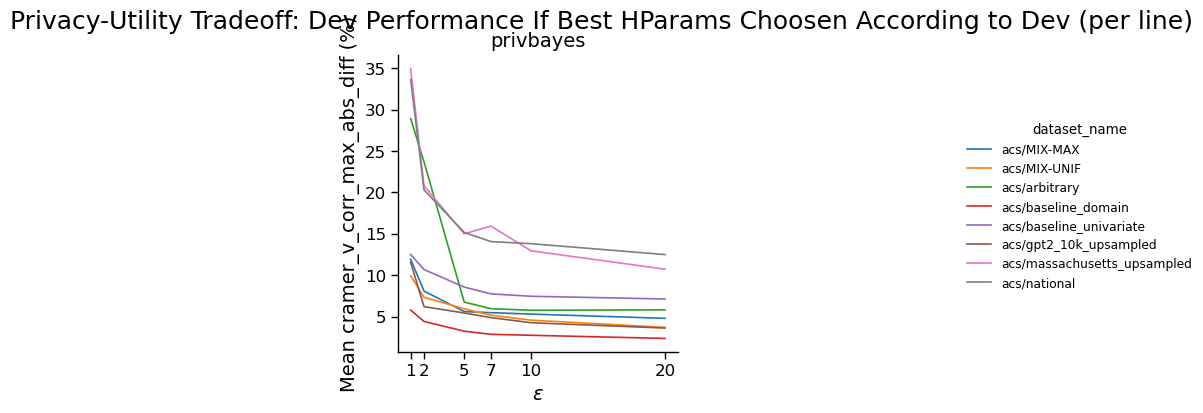

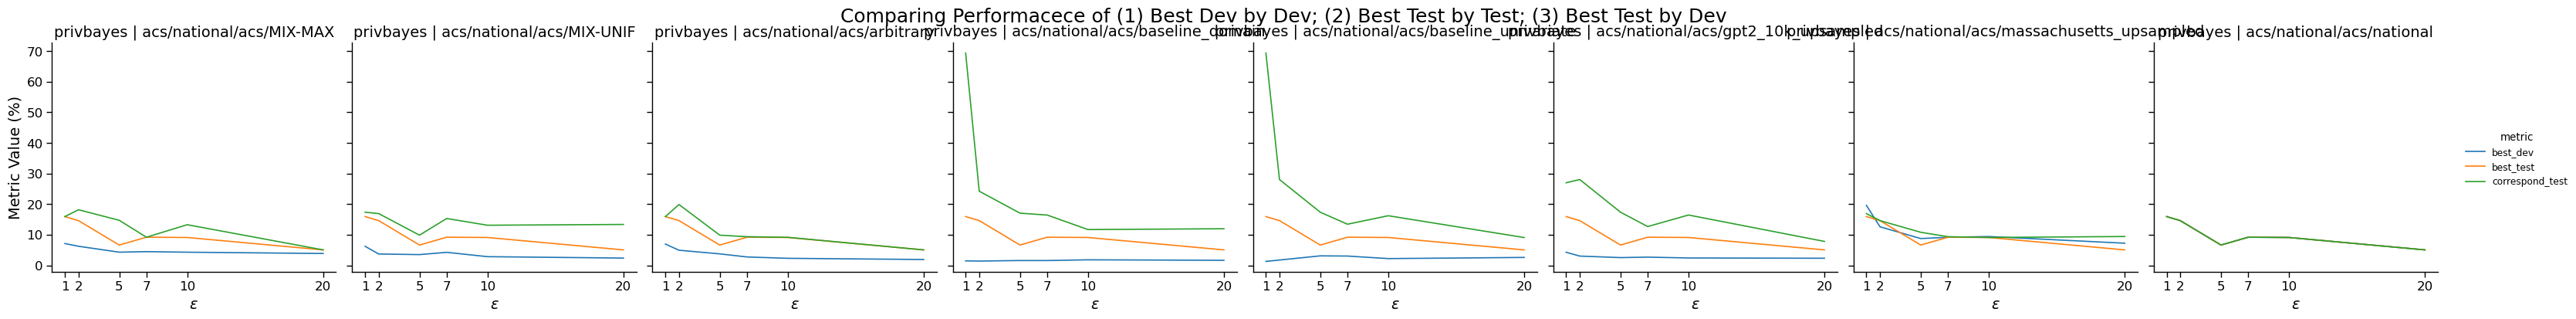

### cramer_v_corr_avg_abs_diff

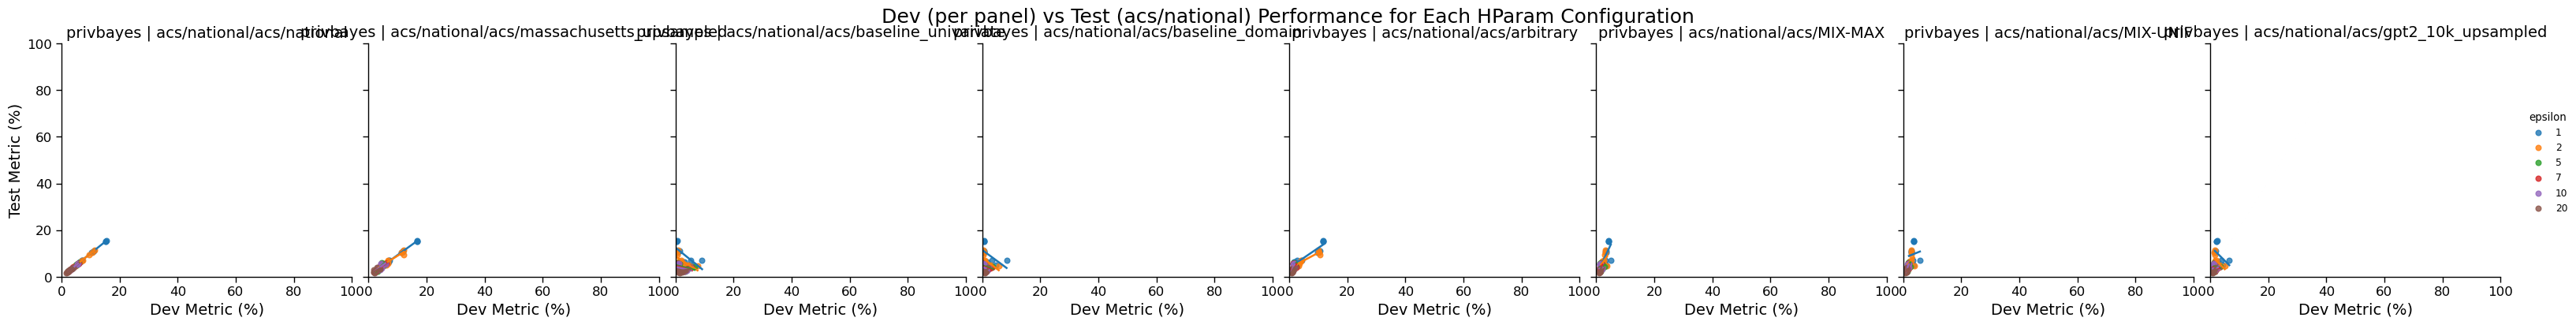

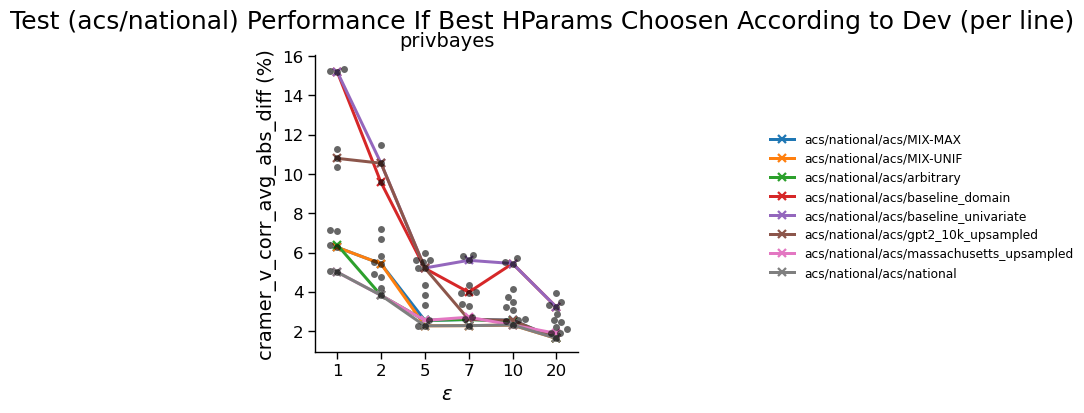

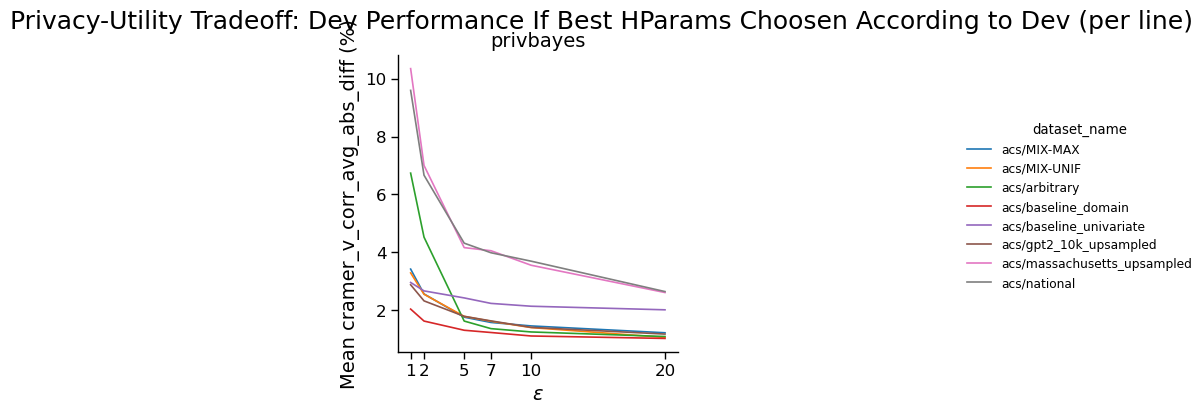

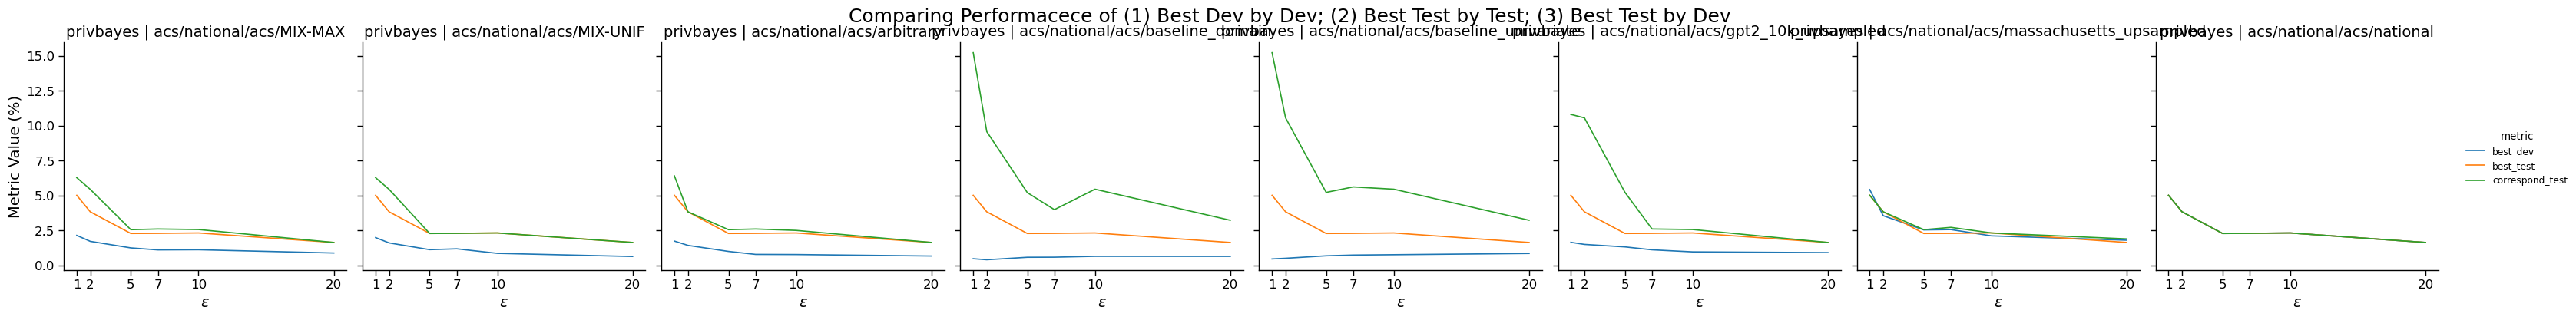

### error_rate_diff

/opt/homebrew/Caskroom/miniconda/base/envs/ydnpd/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

8.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



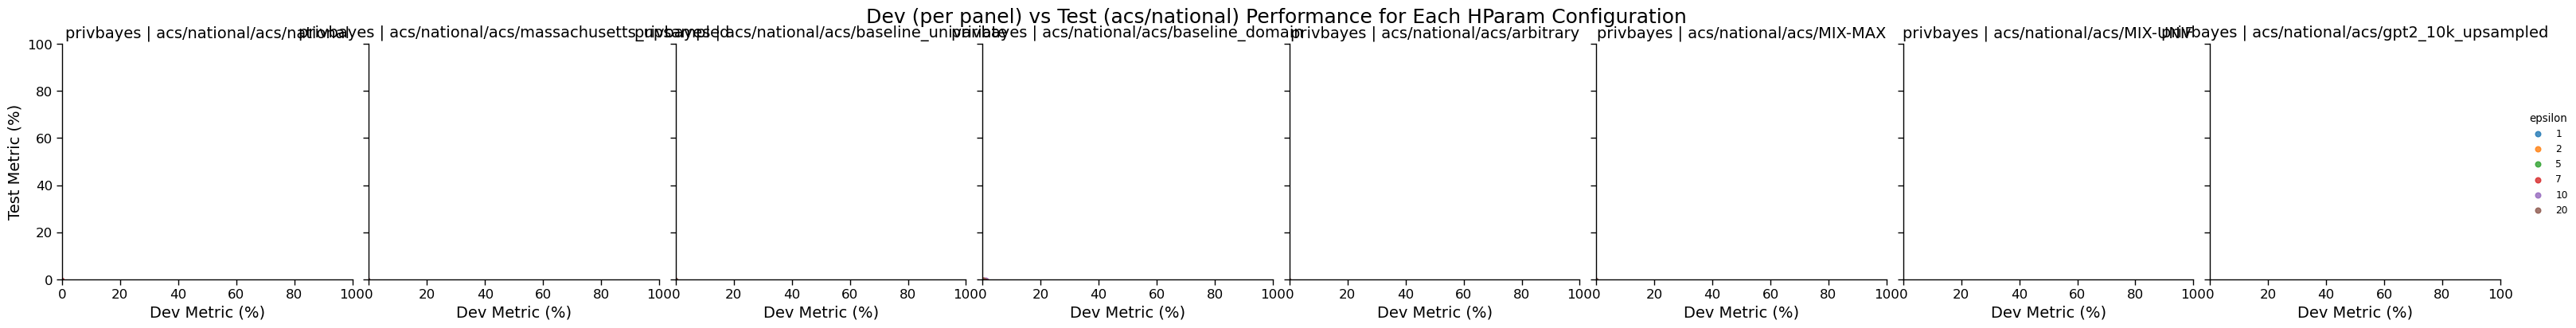

/opt/homebrew/Caskroom/miniconda/base/envs/ydnpd/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/opt/homebrew/Caskroom/miniconda/base/envs/ydnpd/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

8.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



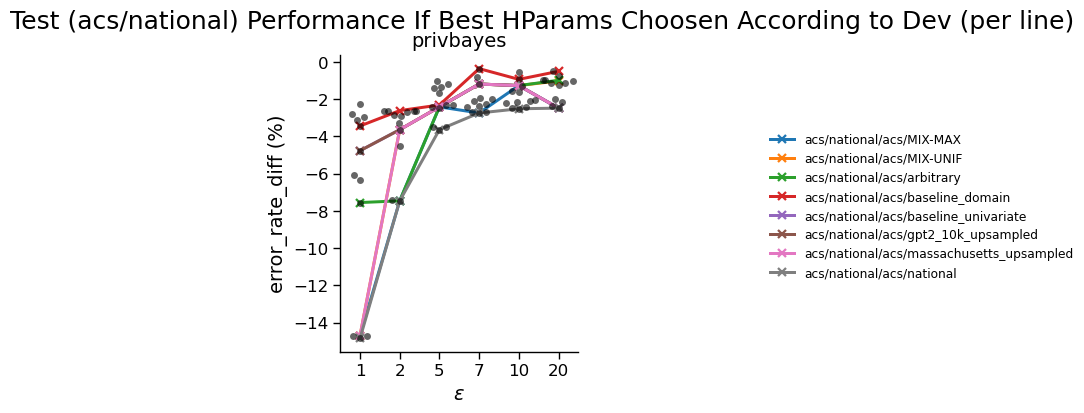

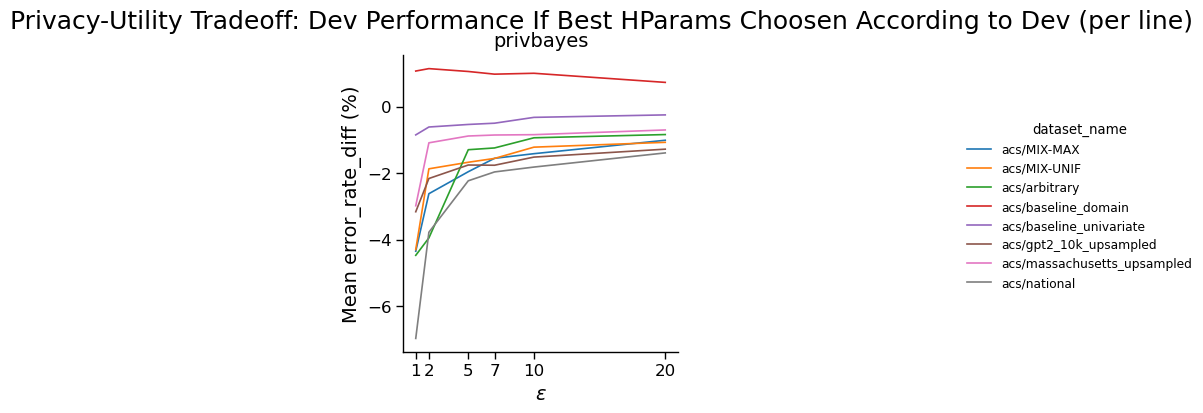

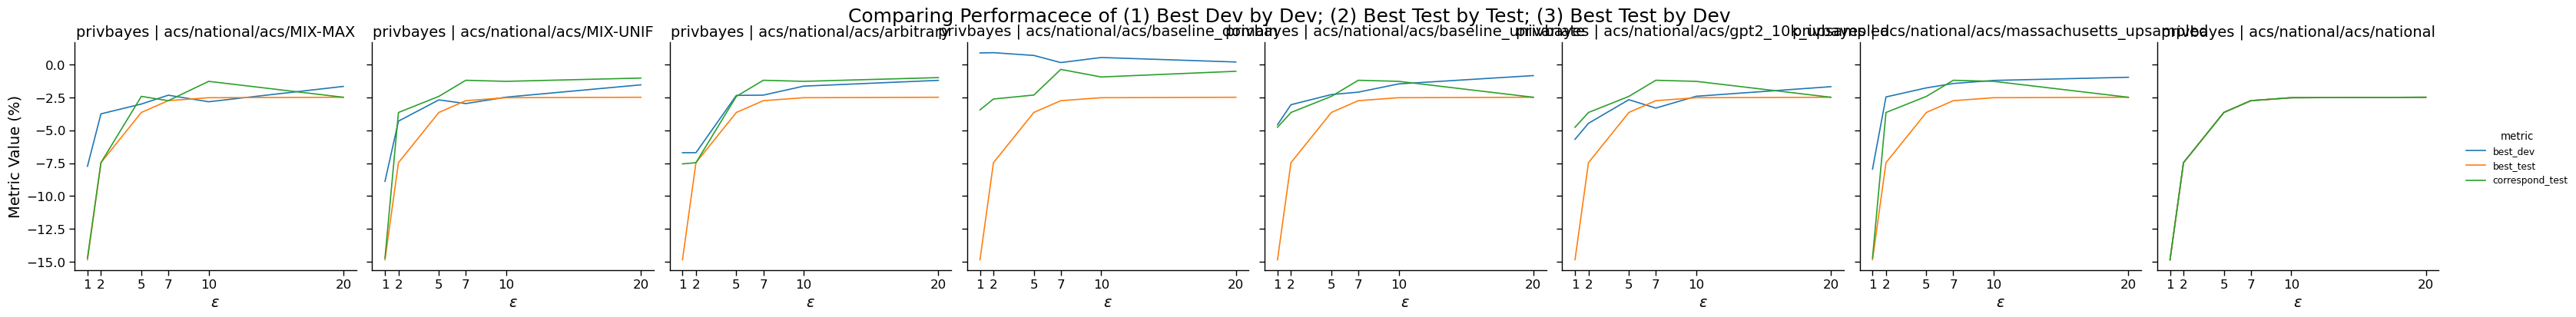

### error_rate_train_dataset

/opt/homebrew/Caskroom/miniconda/base/envs/ydnpd/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

41.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/opt/homebrew/Caskroom/miniconda/base/envs/ydnpd/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

58.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/opt/homebrew/Caskroom/miniconda/base/envs/ydnpd/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



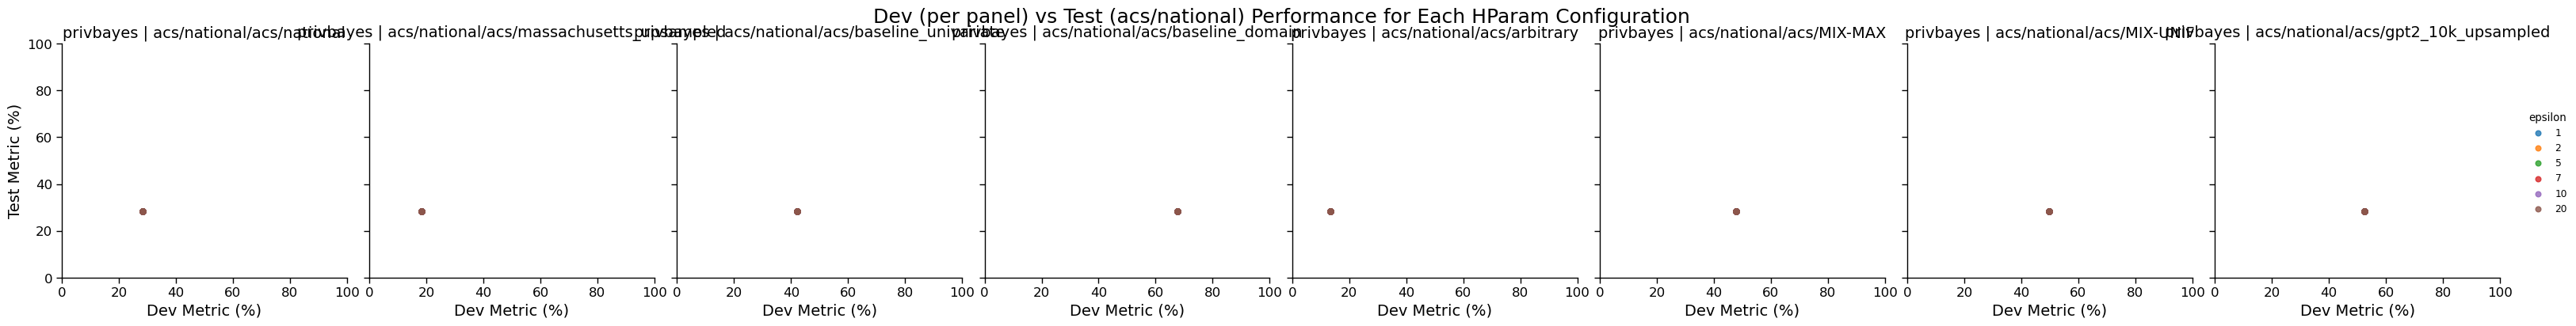

/opt/homebrew/Caskroom/miniconda/base/envs/ydnpd/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

58.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



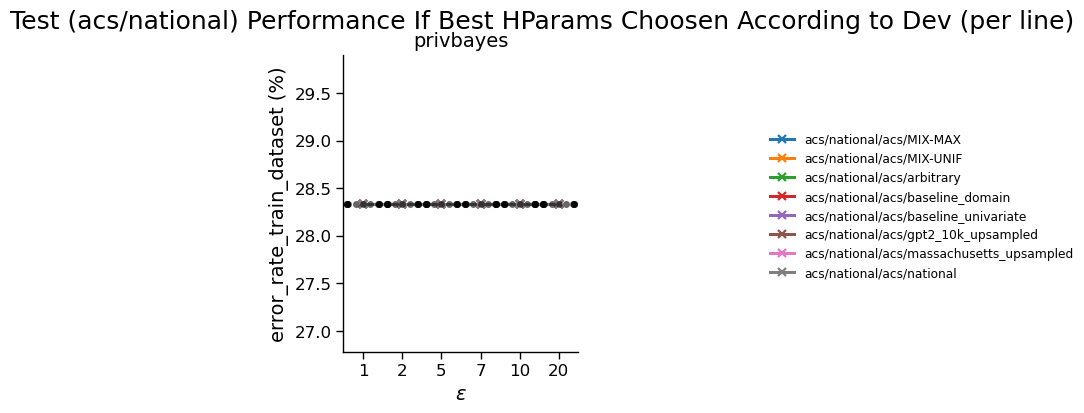

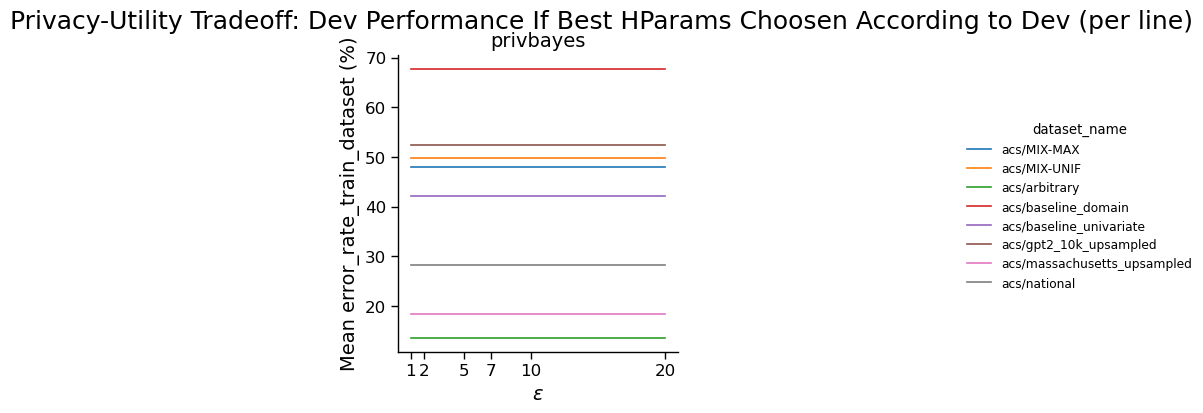

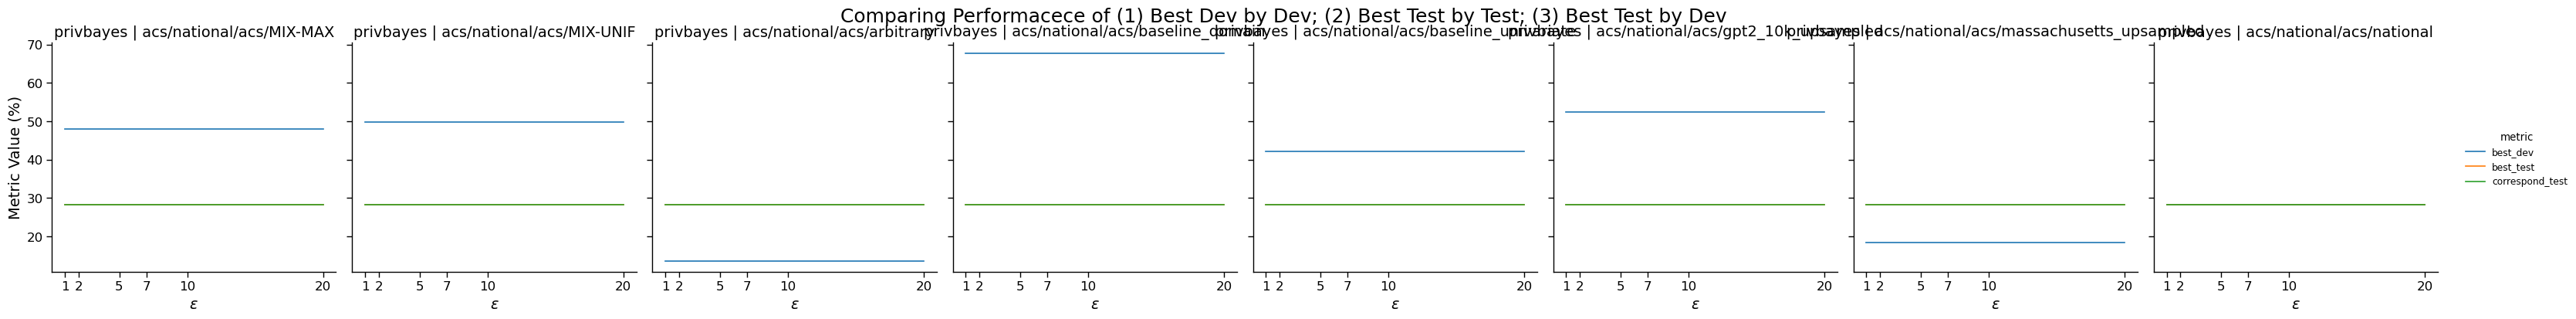

### error_rate_synth_dataset

/opt/homebrew/Caskroom/miniconda/base/envs/ydnpd/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

8.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



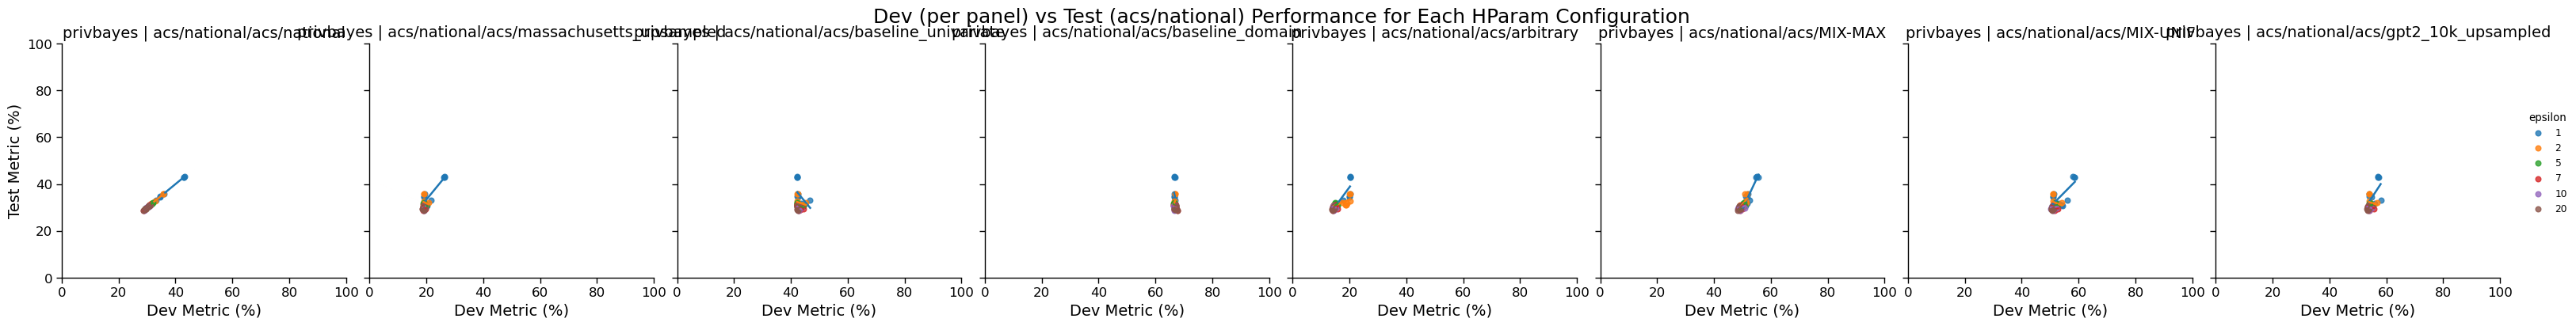

/opt/homebrew/Caskroom/miniconda/base/envs/ydnpd/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/opt/homebrew/Caskroom/miniconda/base/envs/ydnpd/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

8.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



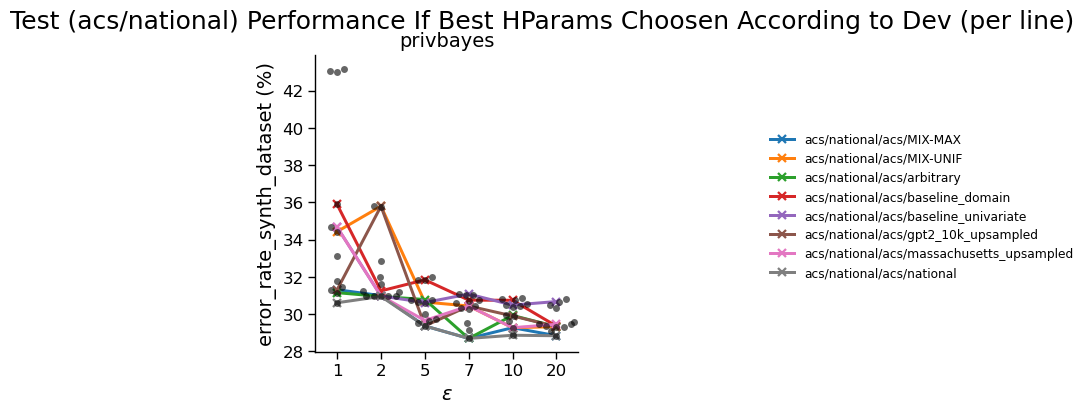

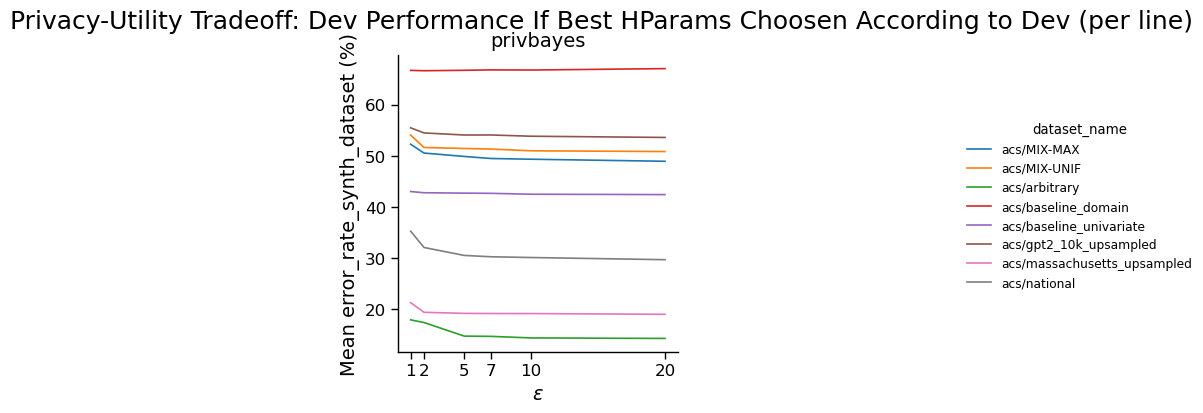

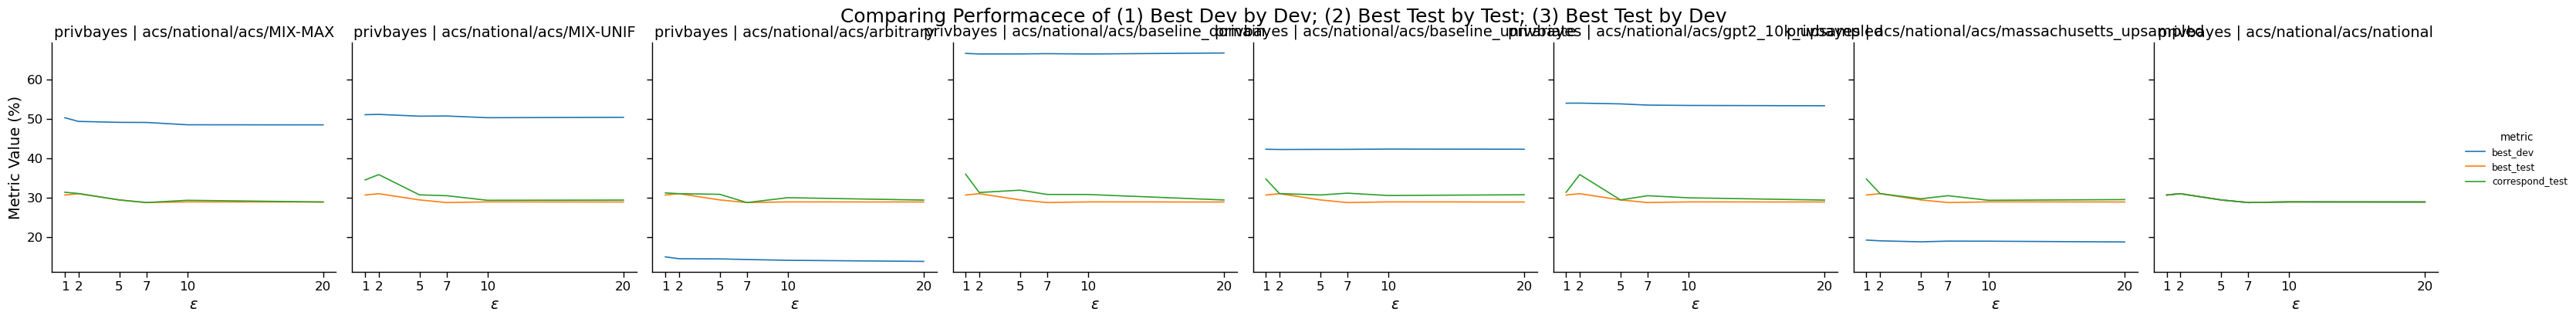

### aoc_diff

/opt/homebrew/Caskroom/miniconda/base/envs/ydnpd/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/opt/homebrew/Caskroom/miniconda/base/envs/ydnpd/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/opt/homebrew/Caskroom/miniconda/base/envs/ydnpd/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/opt/homebrew/Caskroom/miniconda/base/envs/ydnpd/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/opt/homebrew/Caskroom/miniconda/base/envs/ydnpd/lib/python3.10/site-packages/seaborn/catego

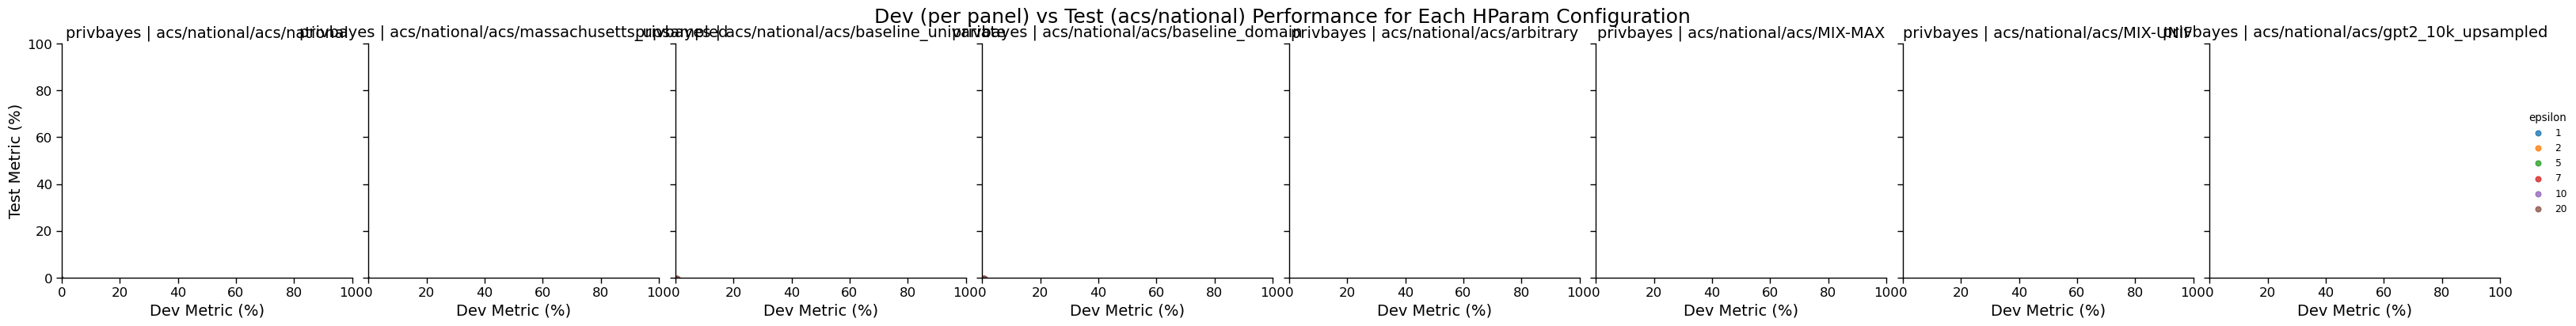

/opt/homebrew/Caskroom/miniconda/base/envs/ydnpd/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

8.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/opt/homebrew/Caskroom/miniconda/base/envs/ydnpd/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/opt/homebrew/Caskroom/miniconda/base/envs/ydnpd/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



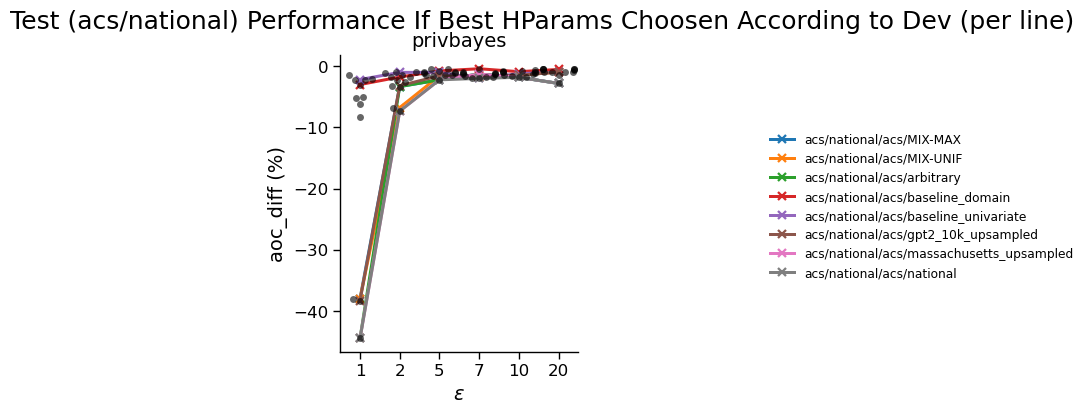

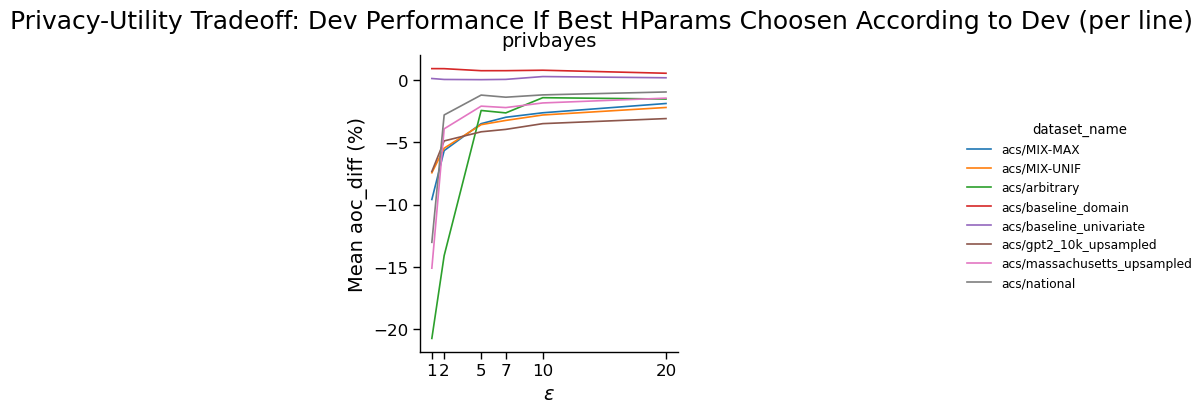

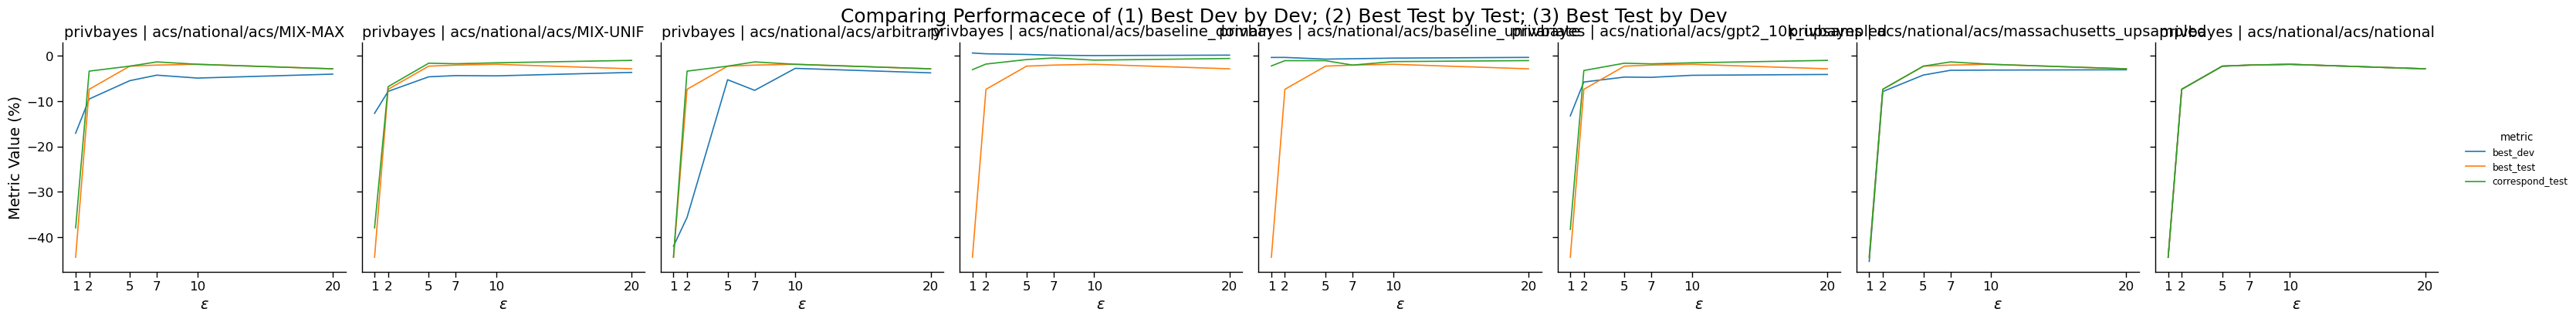

### aoc_train_dataset

/opt/homebrew/Caskroom/miniconda/base/envs/ydnpd/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

41.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/opt/homebrew/Caskroom/miniconda/base/envs/ydnpd/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

58.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/opt/homebrew/Caskroom/miniconda/base/envs/ydnpd/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

8.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



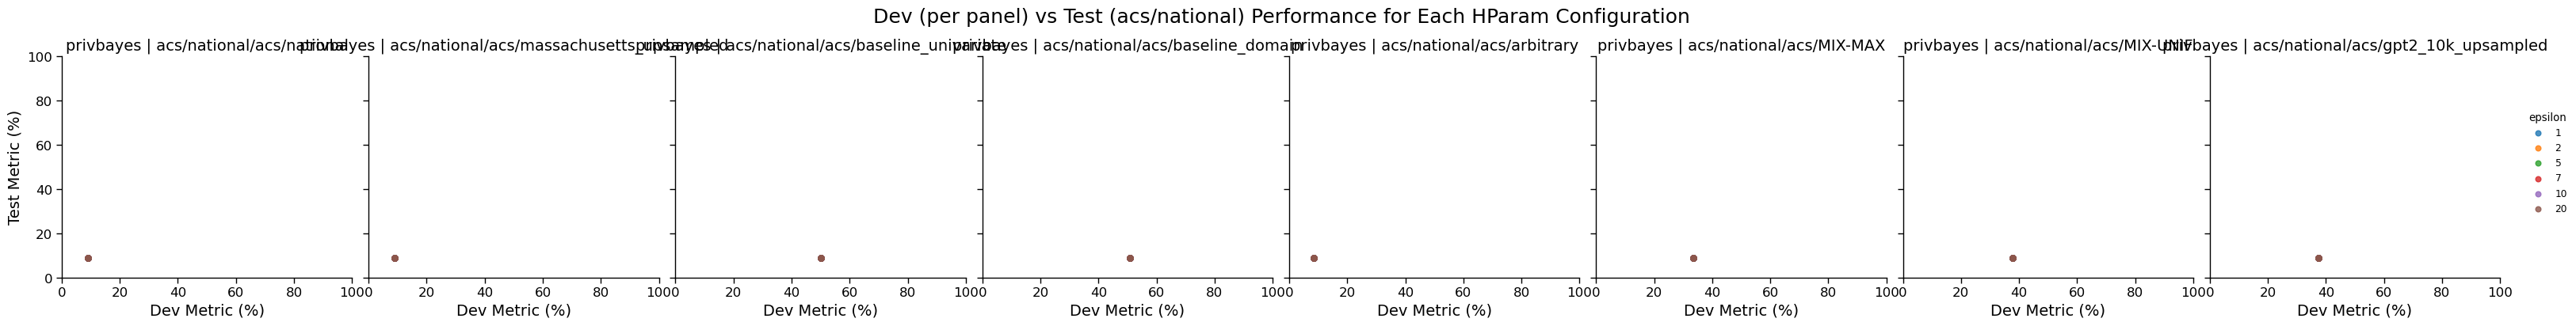

/opt/homebrew/Caskroom/miniconda/base/envs/ydnpd/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

58.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



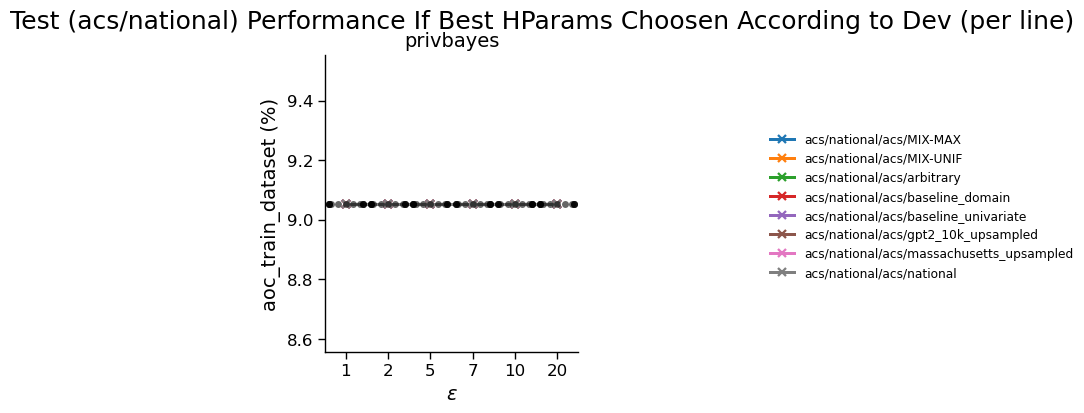

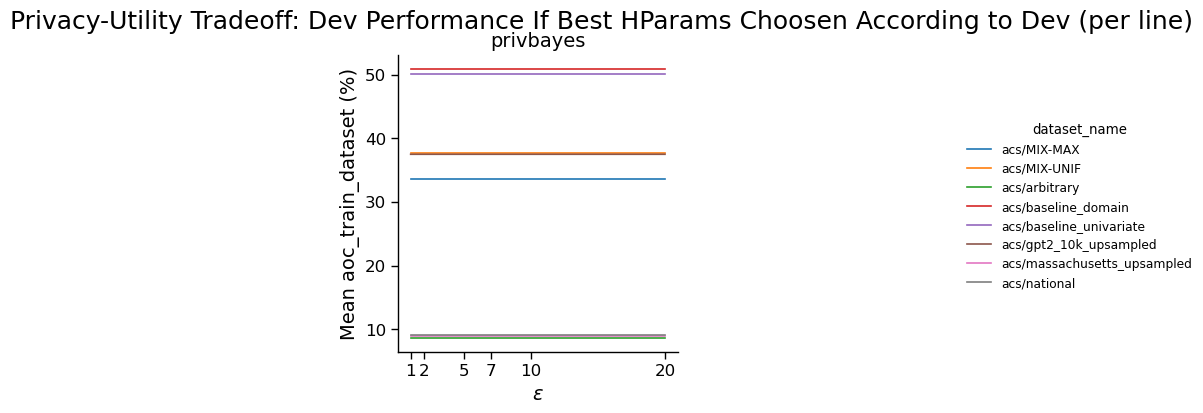

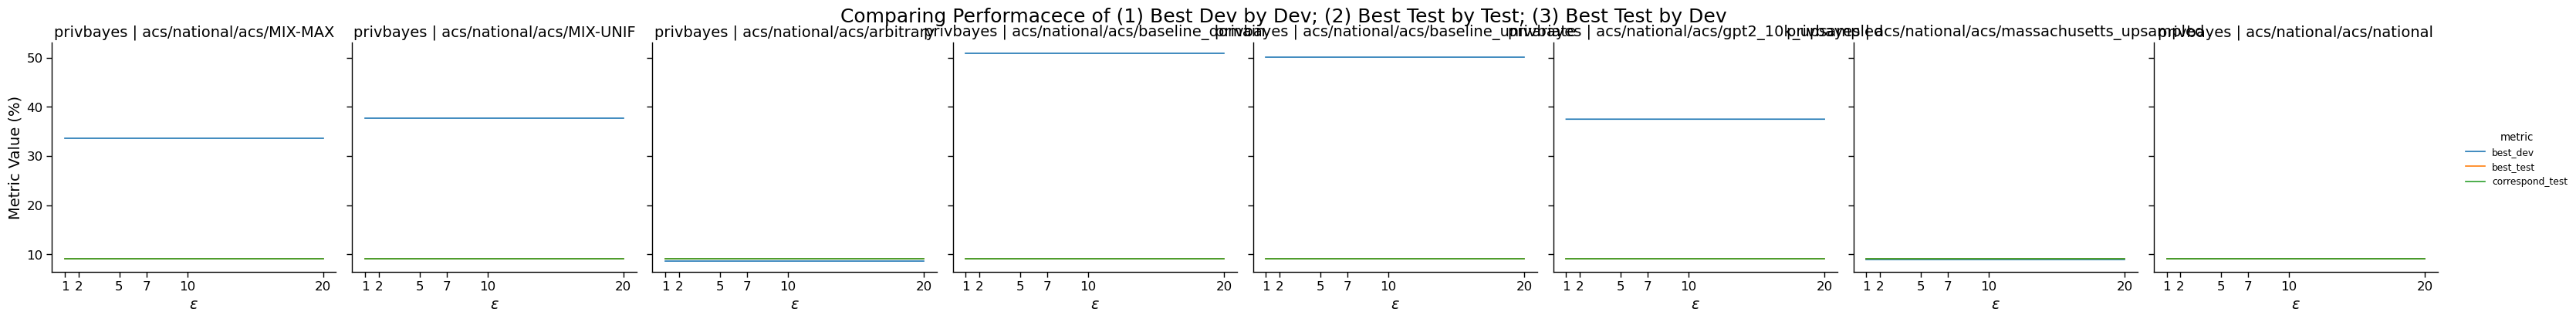

### aoc_synth_dataset

/opt/homebrew/Caskroom/miniconda/base/envs/ydnpd/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/opt/homebrew/Caskroom/miniconda/base/envs/ydnpd/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

41.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/opt/homebrew/Caskroom/miniconda/base/envs/ydnpd/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/opt/homebrew/Caskroom/miniconda/base/envs/ydnpd/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



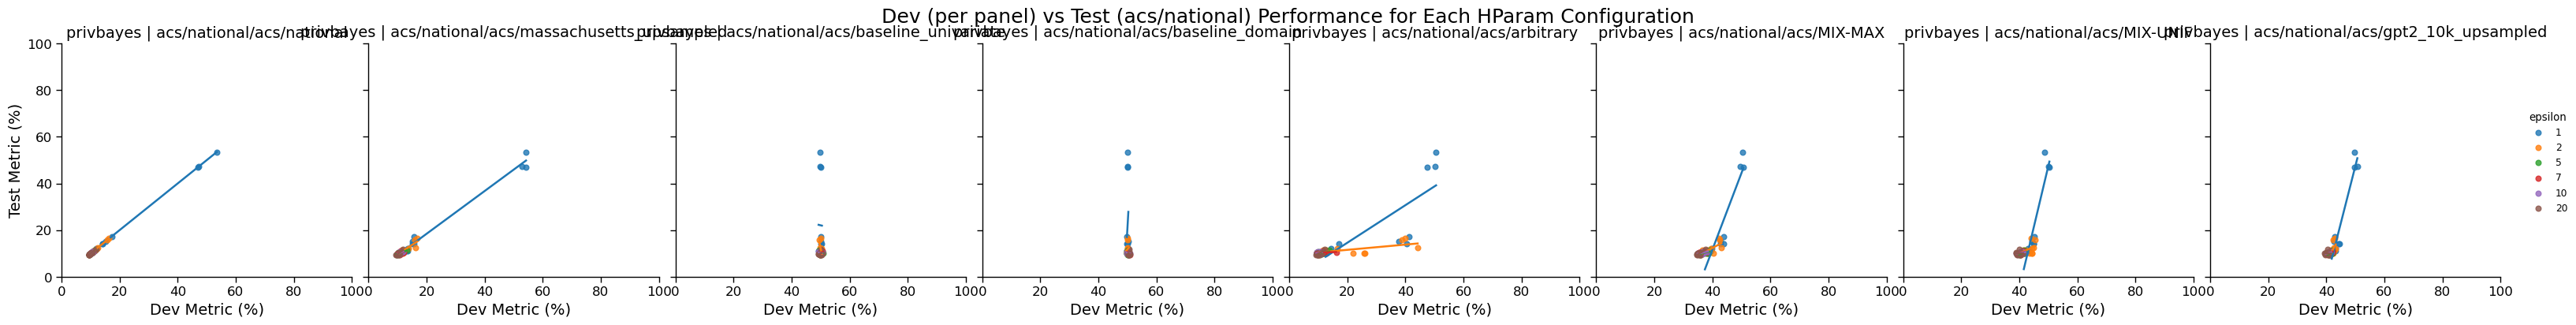

/opt/homebrew/Caskroom/miniconda/base/envs/ydnpd/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

8.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/opt/homebrew/Caskroom/miniconda/base/envs/ydnpd/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

41.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/opt/homebrew/Caskroom/miniconda/base/envs/ydnpd/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



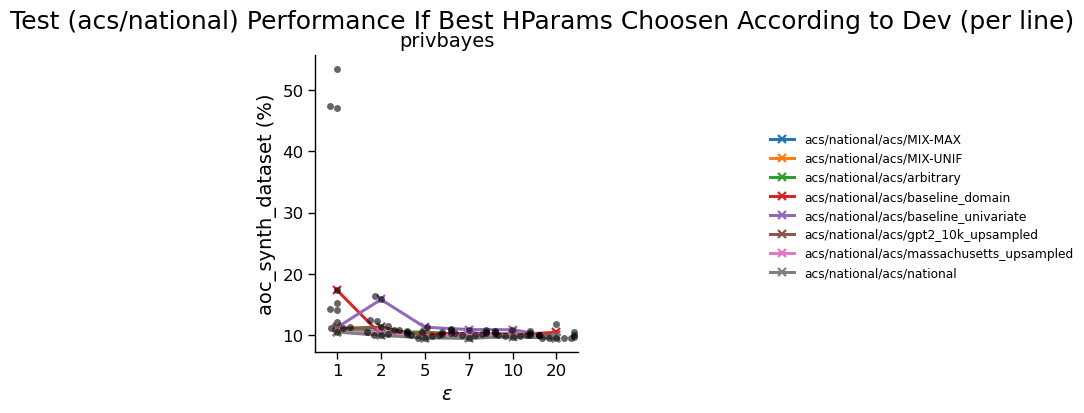

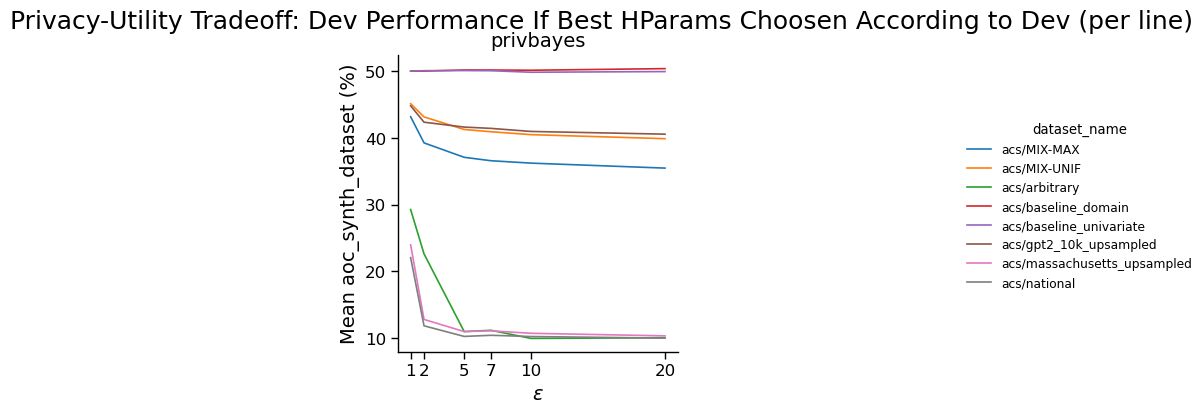

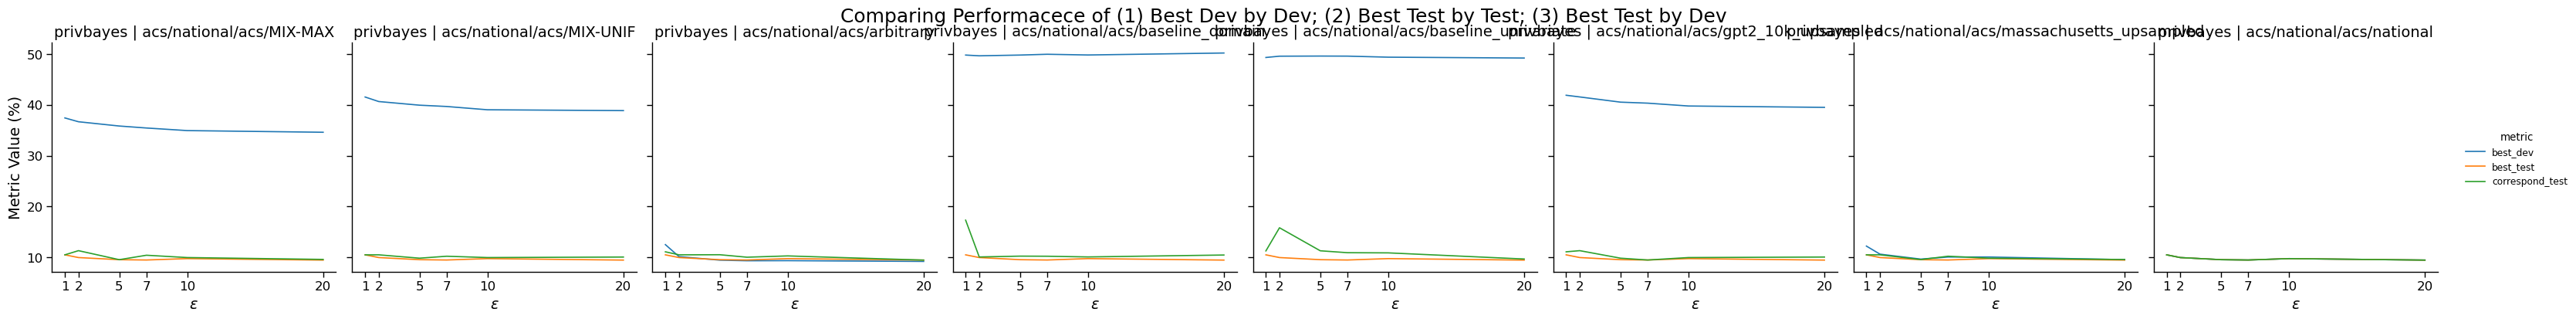

### total_variation_distance

quantile  \
synth_name experiment                               epsilon             
privbayes  acs/national/acs/MIX-MAX                 1            25.0   
                                                    2             8.3   
                                                    5             8.3   
                                                    7             0.0   
                                                    10            0.0   
                                                    20            0.0   
           acs/national/acs/MIX-UNIF                1            25.0   
                                                    2            16.7   
                                                    5             0.0   
                                                    7             0.0   
                                                    10            0.0   
                                                    20            0.0   
           acs/national/acs/arbitrary               1             0.0   
                                                    2             0.0   
                                                    5             0.0   
                                                    7             0.0   
                                                    10            0.0   
                                                    20            0.0   
           acs/national/acs/baseline_domain         1            16.7   
                                                    2             0.0   
                                                    5             0.0   
                                                    7             0.0   
                                                    10            0.0   
                                                    20            0.0   
           acs/national/acs/baseline_univariate     1            50.0   
                                                    2            75.0   
                                                    5            91.7   
                                                    7            91.7   
                                                    10           16.7   
                                                    20            0.0   
           acs/national/acs/gpt2_10k_upsampled      1            58.3   
                                                    2            91.7   
                                                    5             0.0   
                                                    7             0.0   
                                                    10            0.0   
                                                    20            0.0   
           acs/national/acs/massachusetts_upsampled 1             0.0   
                                                    2             0.0   
                                                    5             0.0   
                                                    7             0.0   
                                                    10            0.0   
                                                    20            0.0   
           acs/national/acs/national                1             0.0   
                                                    2             0.0   
                                                    5             0.0   
                                                    7             0.0   
                                                    10            0.0   
                                                    20            0.0   

                                                             best_dev  \
synth_name experiment                               epsilon             
privbayes  acs/national/acs/MIX-MAX                 1            52.8   
                                                    2            52.1   
                                                    5            50.5   
                                             

### marginals_3_max_abs_diff_error

quantile  \
synth_name experiment                               epsilon             
privbayes  acs/national/acs/MIX-MAX                 1             8.3   
                                                    2            41.7   
                                                    5            83.3   
                                                    7            33.3   
                                                    10           33.3   
                                                    20           33.3   
           acs/national/acs/MIX-UNIF                1             8.3   
                                                    2            41.7   
                                                    5            16.7   
                                                    7            50.0   
                                                    10           75.0   
                                                    20            0.0   
           acs/national/acs/arbitrary               1            25.0   
                                                    2            33.3   
                                                    5            16.7   
                                                    7            33.3   
                                                    10           25.0   
                                                    20            8.3   
           acs/national/acs/baseline_domain         1            58.3   
                                                    2             0.0   
                                                    5            33.3   
                                                    7            66.7   
                                                    10           91.7   
                                                    20            0.0   
           acs/national/acs/baseline_univariate     1            50.0   
                                                    2             0.0   
                                                    5            50.0   
                                                    7            50.0   
                                                    10           41.7   
                                                    20           50.0   
           acs/national/acs/gpt2_10k_upsampled      1             8.3   
                                                    2            16.7   
                                                    5            66.7   
                                                    7            16.7   
                                                    10           50.0   
                                                    20            0.0   
           acs/national/acs/massachusetts_upsampled 1             8.3   
                                                    2            25.0   
                                                    5             8.3   
                                                    7            25.0   
                                                    10           41.7   
                                                    20           33.3   
           acs/national/acs/national                1             0.0   
                                                    2             0.0   
                                                    5             0.0   
                                                    7             0.0   
                                                    10            0.0   
                                                    20            0.0   

                                                             best_dev  \
synth_name experiment                               epsilon             
privbayes  acs/national/acs/MIX-MAX                 1             1.1   
                                                    2             1.2   
                                                    5             0.8   
                                             

### marginals_3_avg_abs_diff_error

quantile  \
synth_name experiment                               epsilon             
privbayes  acs/national/acs/MIX-MAX                 1             8.3   
                                                    2             0.0   
                                                    5             8.3   
                                                    7             8.3   
                                                    10            8.3   
                                                    20            0.0   
           acs/national/acs/MIX-UNIF                1             8.3   
                                                    2             0.0   
                                                    5             8.3   
                                                    7             8.3   
                                                    10            8.3   
                                                    20            0.0   
           acs/national/acs/arbitrary               1             8.3   
                                                    2             0.0   
                                                    5             8.3   
                                                    7             8.3   
                                                    10            8.3   
                                                    20            0.0   
           acs/national/acs/baseline_domain         1            41.7   
                                                    2            41.7   
                                                    5             8.3   
                                                    7             8.3   
                                                    10            8.3   
                                                    20            8.3   
           acs/national/acs/baseline_univariate     1            83.3   
                                                    2            83.3   
                                                    5            41.7   
                                                    7            25.0   
                                                    10           33.3   
                                                    20           33.3   
           acs/national/acs/gpt2_10k_upsampled      1            41.7   
                                                    2            41.7   
                                                    5             8.3   
                                                    7             8.3   
                                                    10            8.3   
                                                    20            0.0   
           acs/national/acs/massachusetts_upsampled 1             0.0   
                                                    2             0.0   
                                                    5             8.3   
                                                    7             8.3   
                                                    10            8.3   
                                                    20            0.0   
           acs/national/acs/national                1             0.0   
                                                    2             0.0   
                                                    5             0.0   
                                                    7             0.0   
                                                    10            0.0   
                                                    20            0.0   

                                                             best_dev  \
synth_name experiment                               epsilon             
privbayes  acs/national/acs/MIX-MAX                 1            12.7   
                                                    2            11.5   
                                                    5             9.8   
                                             

### thresholded_marginals_3_max_abs_diff_error

quantile  \
synth_name experiment                               epsilon             
privbayes  acs/national/acs/MIX-MAX                 1            16.7   
                                                    2             0.0   
                                                    5             0.0   
                                                    7             0.0   
                                                    10            0.0   
                                                    20           16.7   
           acs/national/acs/MIX-UNIF                1            16.7   
                                                    2            16.7   
                                                    5             8.3   
                                                    7             8.3   
                                                    10            0.0   
                                                    20            0.0   
           acs/national/acs/arbitrary               1             0.0   
                                                    2             8.3   
                                                    5            16.7   
                                                    7             0.0   
                                                    10           33.3   
                                                    20            0.0   
           acs/national/acs/baseline_domain         1            75.0   
                                                    2            50.0   
                                                    5            41.7   
                                                    7            16.7   
                                                    10            0.0   
                                                    20           41.7   
           acs/national/acs/baseline_univariate     1            58.3   
                                                    2            41.7   
                                                    5            50.0   
                                                    7            75.0   
                                                    10           41.7   
                                                    20           16.7   
           acs/national/acs/gpt2_10k_upsampled      1            50.0   
                                                    2            66.7   
                                                    5            75.0   
                                                    7            25.0   
                                                    10            8.3   
                                                    20           33.3   
           acs/national/acs/massachusetts_upsampled 1             0.0   
                                                    2             0.0   
                                                    5             0.0   
                                                    7             0.0   
                                                    10            0.0   
                                                    20            0.0   
           acs/national/acs/national                1             0.0   
                                                    2             0.0   
                                                    5             0.0   
                                                    7             0.0   
                                                    10            0.0   
                                                    20            0.0   

                                                             best_dev  \
synth_name experiment                               epsilon             
privbayes  acs/national/acs/MIX-MAX                 1             2.3   
                                                    2             2.1   
                                                    5             1.3   
                                             

### thresholded_marginals_3_avg_abs_diff_error

quantile  \
synth_name experiment                               epsilon             
privbayes  acs/national/acs/MIX-MAX                 1             0.0   
                                                    2             8.3   
                                                    5             0.0   
                                                    7             0.0   
                                                    10            0.0   
                                                    20           41.7   
           acs/national/acs/MIX-UNIF                1             0.0   
                                                    2             8.3   
                                                    5             0.0   
                                                    7             0.0   
                                                    10            0.0   
                                                    20            0.0   
           acs/national/acs/arbitrary               1             0.0   
                                                    2             8.3   
                                                    5             0.0   
                                                    7             0.0   
                                                    10           33.3   
                                                    20           50.0   
           acs/national/acs/baseline_domain         1            75.0   
                                                    2            50.0   
                                                    5            33.3   
                                                    7             8.3   
                                                    10            0.0   
                                                    20           16.7   
           acs/national/acs/baseline_univariate     1            75.0   
                                                    2            33.3   
                                                    5            50.0   
                                                    7            75.0   
                                                    10           50.0   
                                                    20            8.3   
           acs/national/acs/gpt2_10k_upsampled      1            50.0   
                                                    2            75.0   
                                                    5            83.3   
                                                    7            50.0   
                                                    10            8.3   
                                                    20           33.3   
           acs/national/acs/massachusetts_upsampled 1             8.3   
                                                    2             8.3   
                                                    5             0.0   
                                                    7             0.0   
                                                    10            0.0   
                                                    20            0.0   
           acs/national/acs/national                1             0.0   
                                                    2             0.0   
                                                    5             0.0   
                                                    7             0.0   
                                                    10            0.0   
                                                    20            0.0   

                                                             best_dev  \
synth_name experiment                               epsilon             
privbayes  acs/national/acs/MIX-MAX                 1             3.8   
                                                    2             3.2   
                                                    5             2.3   
                                             

### pearson_corr_max_abs_diff

quantile  \
synth_name experiment                               epsilon             
privbayes  acs/national/acs/MIX-MAX                 1            33.3   
                                                    2            16.7   
                                                    5             8.3   
                                                    7             0.0   
                                                    10           16.7   
                                                    20            0.0   
           acs/national/acs/MIX-UNIF                1            33.3   
                                                    2            41.7   
                                                    5             0.0   
                                                    7             8.3   
                                                    10            0.0   
                                                    20            0.0   
           acs/national/acs/arbitrary               1            25.0   
                                                    2            41.7   
                                                    5             0.0   
                                                    7            25.0   
                                                    10           16.7   
                                                    20            0.0   
           acs/national/acs/baseline_domain         1            75.0   
                                                    2            58.3   
                                                    5            75.0   
                                                    7            75.0   
                                                    10           75.0   
                                                    20           75.0   
           acs/national/acs/baseline_univariate     1            75.0   
                                                    2            75.0   
                                                    5            91.7   
                                                    7            75.0   
                                                    10           91.7   
                                                    20           41.7   
           acs/national/acs/gpt2_10k_upsampled      1            66.7   
                                                    2            75.0   
                                                    5            75.0   
                                                    7            91.7   
                                                    10            8.3   
                                                    20           25.0   
           acs/national/acs/massachusetts_upsampled 1             0.0   
                                                    2             0.0   
                                                    5             0.0   
                                                    7            25.0   
                                                    10            0.0   
                                                    20           16.7   
           acs/national/acs/national                1             0.0   
                                                    2             0.0   
                                                    5             0.0   
                                                    7             0.0   
                                                    10            0.0   
                                                    20            0.0   

                                                             best_dev  \
synth_name experiment                               epsilon             
privbayes  acs/national/acs/MIX-MAX                 1            10.5   
                                                    2             9.3   
                                                    5             6.7   
                                             

### pearson_corr_avg_abs_diff

quantile  \
synth_name experiment                               epsilon             
privbayes  acs/national/acs/MIX-MAX                 1            33.3   
                                                    2            41.7   
                                                    5            16.7   
                                                    7             8.3   
                                                    10           25.0   
                                                    20            0.0   
           acs/national/acs/MIX-UNIF                1            33.3   
                                                    2            41.7   
                                                    5             0.0   
                                                    7             8.3   
                                                    10            0.0   
                                                    20            0.0   
           acs/national/acs/arbitrary               1            25.0   
                                                    2             0.0   
                                                    5            16.7   
                                                    7             8.3   
                                                    10           25.0   
                                                    20            0.0   
           acs/national/acs/baseline_domain         1            75.0   
                                                    2            75.0   
                                                    5            75.0   
                                                    7            58.3   
                                                    10           83.3   
                                                    20           75.0   
           acs/national/acs/baseline_univariate     1            75.0   
                                                    2            83.3   
                                                    5            83.3   
                                                    7            75.0   
                                                    10           83.3   
                                                    20           58.3   
           acs/national/acs/gpt2_10k_upsampled      1            58.3   
                                                    2            50.0   
                                                    5            83.3   
                                                    7             8.3   
                                                    10           25.0   
                                                    20            0.0   
           acs/national/acs/massachusetts_upsampled 1             8.3   
                                                    2             0.0   
                                                    5             0.0   
                                                    7             0.0   
                                                    10            0.0   
                                                    20            8.3   
           acs/national/acs/national                1             0.0   
                                                    2             0.0   
                                                    5             0.0   
                                                    7             0.0   
                                                    10            0.0   
                                                    20            0.0   

                                                             best_dev  \
synth_name experiment                               epsilon             
privbayes  acs/national/acs/MIX-MAX                 1             3.3   
                                                    2             2.8   
                                                    5             2.0   
                                             

### cramer_v_corr_max_abs_diff

quantile  \
synth_name experiment                               epsilon             
privbayes  acs/national/acs/MIX-MAX                 1             0.0   
                                                    2            33.3   
                                                    5            33.3   
                                                    7             0.0   
                                                    10           58.3   
                                                    20            0.0   
           acs/national/acs/MIX-UNIF                1            25.0   
                                                    2            16.7   
                                                    5             8.3   
                                                    7            50.0   
                                                    10           50.0   
                                                    20           75.0   
           acs/national/acs/arbitrary               1             0.0   
                                                    2            58.3   
                                                    5             8.3   
                                                    7             8.3   
                                                    10            8.3   
                                                    20            0.0   
           acs/national/acs/baseline_domain         1            75.0   
                                                    2            75.0   
                                                    5            50.0   
                                                    7            66.7   
                                                    10           25.0   
                                                    20           66.7   
           acs/national/acs/baseline_univariate     1            75.0   
                                                    2            83.3   
                                                    5            75.0   
                                                    7            33.3   
                                                    10           75.0   
                                                    20           16.7   
           acs/national/acs/gpt2_10k_upsampled      1            50.0   
                                                    2            83.3   
                                                    5            75.0   
                                                    7            25.0   
                                                    10           83.3   
                                                    20            8.3   
           acs/national/acs/massachusetts_upsampled 1            16.7   
                                                    2             0.0   
                                                    5            25.0   
                                                    7             8.3   
                                                    10            0.0   
                                                    20           25.0   
           acs/national/acs/national                1             0.0   
                                                    2             0.0   
                                                    5             0.0   
                                                    7             0.0   
                                                    10            0.0   
                                                    20            0.0   

                                                             best_dev  \
synth_name experiment                               epsilon             
privbayes  acs/national/acs/MIX-MAX                 1             7.1   
                                                    2             6.2   
                                                    5             4.3   
                                             

### cramer_v_corr_avg_abs_diff

quantile  \
synth_name experiment                               epsilon             
privbayes  acs/national/acs/MIX-MAX                 1            16.7   
                                                    2            33.3   
                                                    5            16.7   
                                                    7             8.3   
                                                    10           16.7   
                                                    20            0.0   
           acs/national/acs/MIX-UNIF                1            16.7   
                                                    2            33.3   
                                                    5             0.0   
                                                    7             0.0   
                                                    10            0.0   
                                                    20            0.0   
           acs/national/acs/arbitrary               1            25.0   
                                                    2             0.0   
                                                    5            16.7   
                                                    7             8.3   
                                                    10            8.3   
                                                    20            0.0   
           acs/national/acs/baseline_domain         1            75.0   
                                                    2            75.0   
                                                    5            50.0   
                                                    7            58.3   
                                                    10           75.0   
                                                    20           66.7   
           acs/national/acs/baseline_univariate     1            75.0   
                                                    2            83.3   
                                                    5            58.3   
                                                    7            75.0   
                                                    10           75.0   
                                                    20           66.7   
           acs/national/acs/gpt2_10k_upsampled      1            58.3   
                                                    2            83.3   
                                                    5            58.3   
                                                    7             8.3   
                                                    10           16.7   
                                                    20            0.0   
           acs/national/acs/massachusetts_upsampled 1             0.0   
                                                    2             0.0   
                                                    5            16.7   
                                                    7            16.7   
                                                    10            0.0   
                                                    20            8.3   
           acs/national/acs/national                1             0.0   
                                                    2             0.0   
                                                    5             0.0   
                                                    7             0.0   
                                                    10            0.0   
                                                    20            0.0   

                                                             best_dev  \
synth_name experiment                               epsilon             
privbayes  acs/national/acs/MIX-MAX                 1             2.1   
                                                    2             1.7   
                                                    5             1.2   
                                             

### error_rate_diff

quantile  \
synth_name experiment                               epsilon             
privbayes  acs/national/acs/MIX-MAX                 1             8.3   
                                                    2             0.0   
                                                    5            33.3   
                                                    7             0.0   
                                                    10           75.0   
                                                    20            0.0   
           acs/national/acs/MIX-UNIF                1             8.3   
                                                    2            25.0   
                                                    5            33.3   
                                                    7            75.0   
                                                    10           75.0   
                                                    20           58.3   
           acs/national/acs/arbitrary               1            25.0   
                                                    2             0.0   
                                                    5            33.3   
                                                    7            75.0   
                                                    10           75.0   
                                                    20           75.0   
           acs/national/acs/baseline_domain         1            58.3   
                                                    2            91.7   
                                                    5            41.7   
                                                    7            91.7   
                                                    10           83.3   
                                                    20           91.7   
           acs/national/acs/baseline_univariate     1            50.0   
                                                    2            25.0   
                                                    5            33.3   
                                                    7            75.0   
                                                    10           75.0   
                                                    20            0.0   
           acs/national/acs/gpt2_10k_upsampled      1            50.0   
                                                    2            25.0   
                                                    5            33.3   
                                                    7            75.0   
                                                    10           75.0   
                                                    20            0.0   
           acs/national/acs/massachusetts_upsampled 1             8.3   
                                                    2            25.0   
                                                    5            33.3   
                                                    7            75.0   
                                                    10           75.0   
                                                    20            0.0   
           acs/national/acs/national                1             0.0   
                                                    2             0.0   
                                                    5             0.0   
                                                    7             0.0   
                                                    10            0.0   
                                                    20            0.0   

                                                             best_dev  \
synth_name experiment                               epsilon             
privbayes  acs/national/acs/MIX-MAX                 1            -7.7   
                                                    2            -3.7   
                                                    5            -3.0   
                                             

### error_rate_train_dataset

quantile  \
synth_name experiment                               epsilon             
privbayes  acs/national/acs/MIX-MAX                 1             0.0   
                                                    2             0.0   
                                                    5             0.0   
                                                    7             0.0   
                                                    10            0.0   
                                                    20            0.0   
           acs/national/acs/MIX-UNIF                1             0.0   
                                                    2             0.0   
                                                    5             0.0   
                                                    7             0.0   
                                                    10            0.0   
                                                    20            0.0   
           acs/national/acs/arbitrary               1             0.0   
                                                    2             0.0   
                                                    5             0.0   
                                                    7             0.0   
                                                    10            0.0   
                                                    20            0.0   
           acs/national/acs/baseline_domain         1             0.0   
                                                    2             0.0   
                                                    5             0.0   
                                                    7             0.0   
                                                    10            0.0   
                                                    20            0.0   
           acs/national/acs/baseline_univariate     1             0.0   
                                                    2             0.0   
                                                    5             0.0   
                                                    7             0.0   
                                                    10            0.0   
                                                    20            0.0   
           acs/national/acs/gpt2_10k_upsampled      1             0.0   
                                                    2             0.0   
                                                    5             0.0   
                                                    7             0.0   
                                                    10            0.0   
                                                    20            0.0   
           acs/national/acs/massachusetts_upsampled 1             0.0   
                                                    2             0.0   
                                                    5             0.0   
                                                    7             0.0   
                                                    10            0.0   
                                                    20            0.0   
           acs/national/acs/national                1             0.0   
                                                    2             0.0   
                                                    5             0.0   
                                                    7             0.0   
                                                    10            0.0   
                                                    20            0.0   

                                                             best_dev  \
synth_name experiment                               epsilon             
privbayes  acs/national/acs/MIX-MAX                 1            48.0   
                                                    2            48.0   
                                                    5            48.0   
                                             

### error_rate_synth_dataset

quantile  \
synth_name experiment                               epsilon             
privbayes  acs/national/acs/MIX-MAX                 1            16.7   
                                                    2            25.0   
                                                    5             0.0   
                                                    7             0.0   
                                                    10            8.3   
                                                    20            0.0   
           acs/national/acs/MIX-UNIF                1            50.0   
                                                    2            91.7   
                                                    5            50.0   
                                                    7            41.7   
                                                    10            8.3   
                                                    20           25.0   
           acs/national/acs/arbitrary               1             8.3   
                                                    2             0.0   
                                                    5            66.7   
                                                    7             0.0   
                                                    10           33.3   
                                                    20           25.0   
           acs/national/acs/baseline_domain         1            66.7   
                                                    2            50.0   
                                                    5            75.0   
                                                    7            66.7   
                                                    10           75.0   
                                                    20           33.3   
           acs/national/acs/baseline_univariate     1            58.3   
                                                    2             8.3   
                                                    5            41.7   
                                                    7            91.7   
                                                    10           58.3   
                                                    20           83.3   
           acs/national/acs/gpt2_10k_upsampled      1            16.7   
                                                    2            91.7   
                                                    5             0.0   
                                                    7            41.7   
                                                    10           25.0   
                                                    20           25.0   
           acs/national/acs/massachusetts_upsampled 1            58.3   
                                                    2             8.3   
                                                    5            16.7   
                                                    7            41.7   
                                                    10            8.3   
                                                    20           41.7   
           acs/national/acs/national                1             0.0   
                                                    2             0.0   
                                                    5             0.0   
                                                    7             0.0   
                                                    10            0.0   
                                                    20            0.0   

                                                             best_dev  \
synth_name experiment                               epsilon             
privbayes  acs/national/acs/MIX-MAX                 1            50.2   
                                                    2            49.3   
                                                    5            49.0   
                                             

### aoc_diff

quantile  \
synth_name experiment                               epsilon             
privbayes  acs/national/acs/MIX-MAX                 1            16.7   
                                                    2            16.7   
                                                    5             0.0   
                                                    7            50.0   
                                                    10            0.0   
                                                    20            0.0   
           acs/national/acs/MIX-UNIF                1            16.7   
                                                    2             8.3   
                                                    5             8.3   
                                                    7            25.0   
                                                    10           25.0   
                                                    20           41.7   
           acs/national/acs/arbitrary               1             0.0   
                                                    2            16.7   
                                                    5             0.0   
                                                    7            50.0   
                                                    10            0.0   
                                                    20            0.0   
           acs/national/acs/baseline_domain         1            58.3   
                                                    2            58.3   
                                                    5            75.0   
                                                    7            91.7   
                                                    10           66.7   
                                                    20           58.3   
           acs/national/acs/baseline_univariate     1            75.0   
                                                    2            83.3   
                                                    5            66.7   
                                                    7             0.0   
                                                    10           33.3   
                                                    20           33.3   
           acs/national/acs/gpt2_10k_upsampled      1             8.3   
                                                    2            25.0   
                                                    5             8.3   
                                                    7            16.7   
                                                    10           25.0   
                                                    20           41.7   
           acs/national/acs/massachusetts_upsampled 1             0.0   
                                                    2             0.0   
                                                    5             0.0   
                                                    7            50.0   
                                                    10            0.0   
                                                    20            0.0   
           acs/national/acs/national                1             0.0   
                                                    2             0.0   
                                                    5             0.0   
                                                    7             0.0   
                                                    10            0.0   
                                                    20            0.0   

                                                             best_dev  \
synth_name experiment                               epsilon             
privbayes  acs/national/acs/MIX-MAX                 1           -17.1   
                                                    2            -9.5   
                                                    5            -5.5   
                                             

### aoc_train_dataset

quantile  \
synth_name experiment                               epsilon             
privbayes  acs/national/acs/MIX-MAX                 1             0.0   
                                                    2             0.0   
                                                    5             0.0   
                                                    7             0.0   
                                                    10            0.0   
                                                    20            0.0   
           acs/national/acs/MIX-UNIF                1             0.0   
                                                    2             0.0   
                                                    5             0.0   
                                                    7             0.0   
                                                    10            0.0   
                                                    20            0.0   
           acs/national/acs/arbitrary               1             0.0   
                                                    2             0.0   
                                                    5             0.0   
                                                    7             0.0   
                                                    10            0.0   
                                                    20            0.0   
           acs/national/acs/baseline_domain         1             0.0   
                                                    2             0.0   
                                                    5             0.0   
                                                    7             0.0   
                                                    10            0.0   
                                                    20            0.0   
           acs/national/acs/baseline_univariate     1             0.0   
                                                    2             0.0   
                                                    5             0.0   
                                                    7             0.0   
                                                    10            0.0   
                                                    20            0.0   
           acs/national/acs/gpt2_10k_upsampled      1             0.0   
                                                    2             0.0   
                                                    5             0.0   
                                                    7             0.0   
                                                    10            0.0   
                                                    20            0.0   
           acs/national/acs/massachusetts_upsampled 1             0.0   
                                                    2             0.0   
                                                    5             0.0   
                                                    7             0.0   
                                                    10            0.0   
                                                    20            0.0   
           acs/national/acs/national                1             0.0   
                                                    2             0.0   
                                                    5             0.0   
                                                    7             0.0   
                                                    10            0.0   
                                                    20            0.0   

                                                             best_dev  \
synth_name experiment                               epsilon             
privbayes  acs/national/acs/MIX-MAX                 1            33.6   
                                                    2            33.6   
                                                    5            33.6   
                                             

### aoc_synth_dataset

quantile  \
synth_name experiment                               epsilon             
privbayes  acs/national/acs/MIX-MAX                 1             0.0   
                                                    2            50.0   
                                                    5             0.0   
                                                    7            50.0   
                                                    10           25.0   
                                                    20           33.3   
           acs/national/acs/MIX-UNIF                1             0.0   
                                                    2            25.0   
                                                    5            16.7   
                                                    7            25.0   
                                                    10           25.0   
                                                    20           58.3   
           acs/national/acs/arbitrary               1             8.3   
                                                    2            25.0   
                                                    5            58.3   
                                                    7             8.3   
                                                    10           58.3   
                                                    20            0.0   
           acs/national/acs/baseline_domain         1            66.7   
                                                    2             8.3   
                                                    5            50.0   
                                                    7            25.0   
                                                    10           41.7   
                                                    20           83.3   
           acs/national/acs/baseline_univariate     1            25.0   
                                                    2            83.3   
                                                    5            91.7   
                                                    7            83.3   
                                                    10           91.7   
                                                    20           41.7   
           acs/national/acs/gpt2_10k_upsampled      1             8.3   
                                                    2            50.0   
                                                    5            16.7   
                                                    7             0.0   
                                                    10           25.0   
                                                    20           58.3   
           acs/national/acs/massachusetts_upsampled 1             0.0   
                                                    2            25.0   
                                                    5             8.3   
                                                    7            25.0   
                                                    10            8.3   
                                                    20           16.7   
           acs/national/acs/national                1             0.0   
                                                    2             0.0   
                                                    5             0.0   
                                                    7             0.0   
                                                    10            0.0   
                                                    20            0.0   

                                                             best_dev  \
synth_name experiment                               epsilon             
privbayes  acs/national/acs/MIX-MAX                 1            37.4   
                                                    2            36.7   
                                                    5            35.8   
                                             

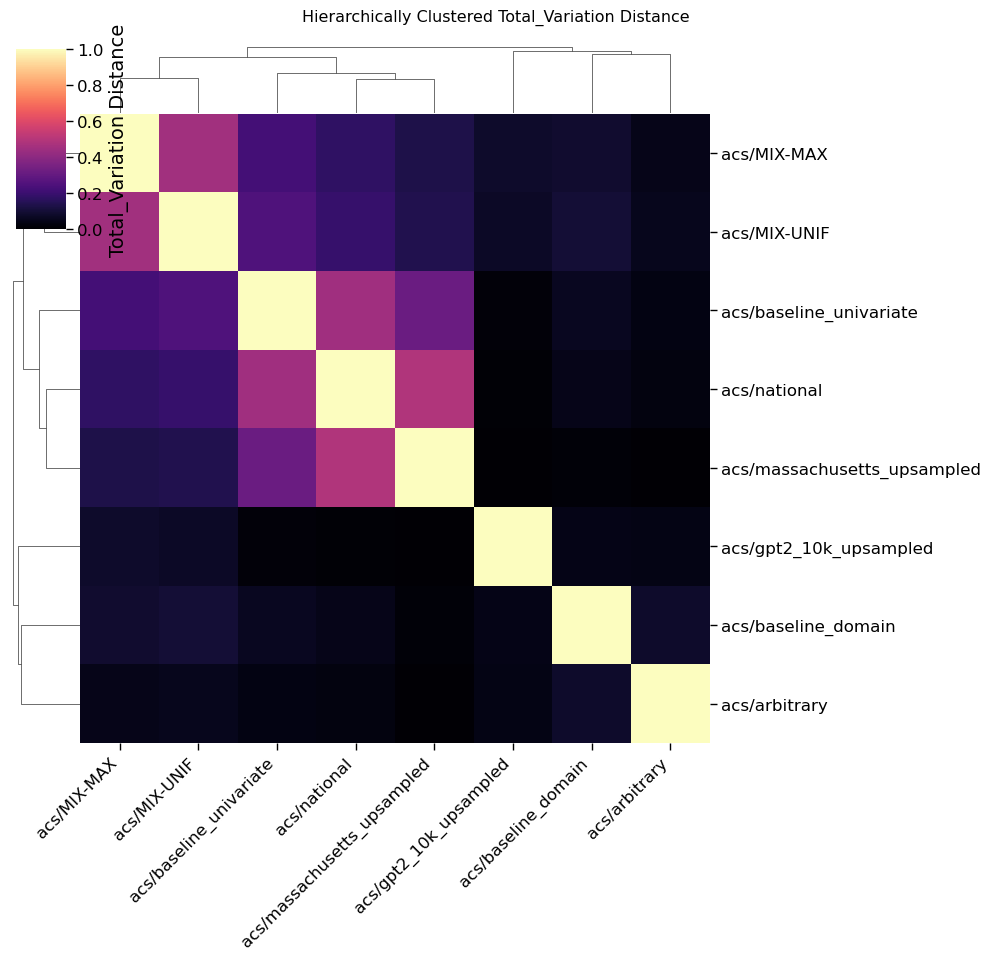

In [7]:
for experiments_name, experiments in ydnpd.ALL_EXPERIMENTS.items():

      if (additional_experiment_datasets := ADDITIONAL_EXPERIMENTS.get(experiments_name)):
            additional_dataset_names = [dataset_name for dataset_name, _ in additional_experiment_datasets]
            experiments = ydnpd.Experiments(experiments.test_name,
                                            experiments.dev_names + additional_dataset_names)            

      display(Markdown(f"## {experiments_name.upper()}"))

      datasets = {}
      for name in experiments.dev_names:
            try:
                  df = ydnpd.load_dataset(name)[0]
            except ValueError:
                  df = ydnpd.load_dataset(name, ADDITIONAL_PATH)[0]
            datasets[name] = df
      g = ydnpd.plot_distribution_distances(datasets)
      display(g.fig)

      ogs = (ydnpd.UtilityTask
            .plot_overall(utility_tasks_results,
                          experiments,
                          epsilon_reference=5)
                                          
      )

      for g in ogs:
            g.show()
            
      for metric in ydnpd.EVALUATION_METRICS:
          if metric not in utility_tasks_results[0]["evaluation"]:
              continue

          display(Markdown(f"### {metric}"))

          gs = ydnpd.UtilityTask.plot(utility_tasks_results, experiments, metric=metric)

          for g in gs:
              display(g.fig)
              plt.close(g.fig)

      for metric in ydnpd.EVALUATION_METRICS:
          if metric not in utility_tasks_results[0]["evaluation"]:
              continue

          display(Markdown(f"### {metric}"))
          with pd.option_context("display.max_rows", None):
              display(
                  ydnpd.UtilityTask.evaluate(utility_tasks_results, experiments, metric)
                  .multiply(100)
                  .round(1)
              )